<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [39]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

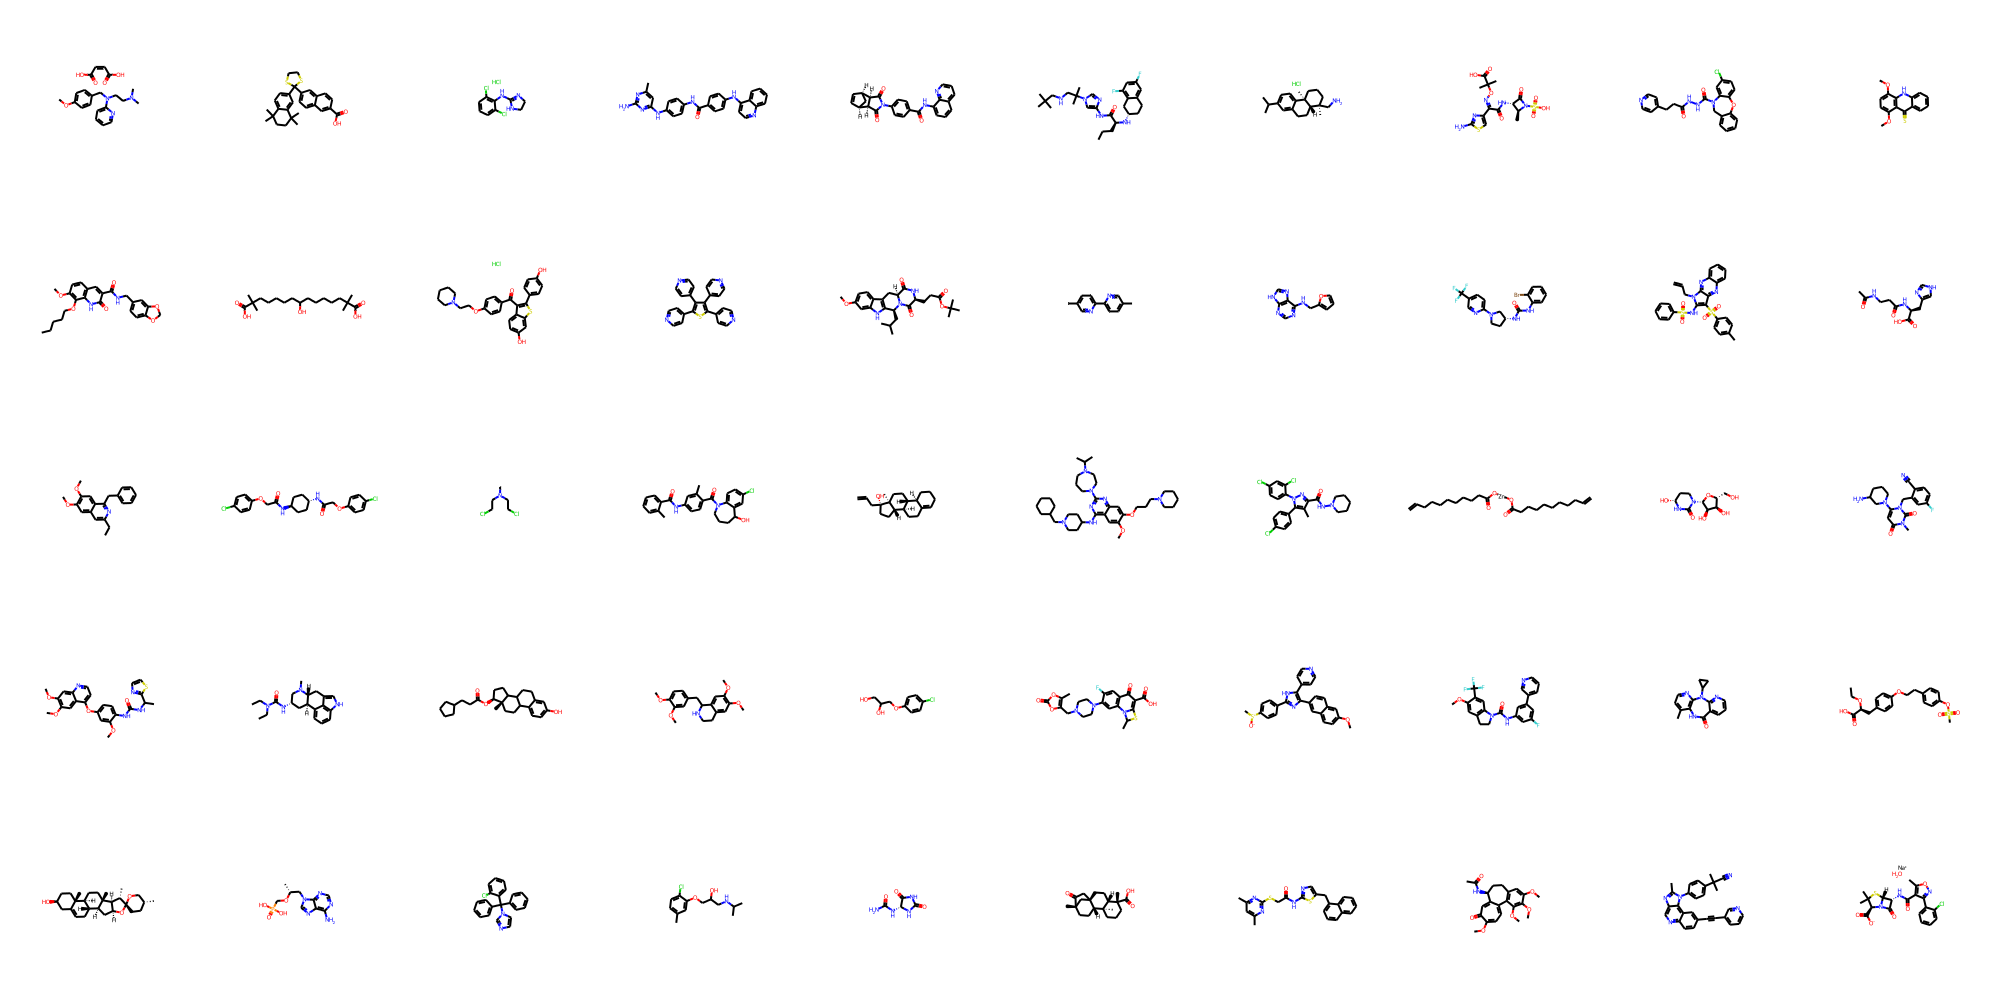

In [54]:
smiles_list = ['COc1ccc(CN(CCN(C)C)c2ccccn2)cc1.O=C(O)/C=C\C(=O)O',
'CC1(C)CCC(C)(C)c2cc(C3(c4ccc5cc(C(=O)O)ccc5c4)SCCS3)ccc21',
'Cl.Clc1cccc(Cl)c1NC1=NCCN1',
'Cc1cc(Nc2ccc(NC(=O)c3ccc(Nc4ccnc5ccccc45)cc3)cc2)nc(N)n1',
'O=C(Nc1cccc2cccnc12)c1ccc(N2C(=O)[C@H]3[C@H]4C=C[C@H](C4)[C@H]3C2=O)cc1',
'CCC[C@H](N[C@H]1CCc2cc(F)cc(F)c2C1)C(=O)Nc1cn(C(C)(C)CNCC(C)(C)C)cn1',
'CC(C)c1ccc2c(c1)CC[C@@H]1[C@]2(C)CCC[C@@]1(C)CN.Cl',
'C[C@H]1[C@H](NC(=O)/C(=N\OC(C)(C)C(=O)O)c2csc(N)n2)C(=O)N1S(=O)(=O)O',
'O=C(CCc1ccncc1)NNC(=O)N1Cc2ccccc2Oc2ccc(Cl)cc21',
'COc1ccc(OC)c2c(=S)c3ccccc3[nH]c12',
'CCCCCOc1c(OC)ccc2cc(C(=O)NCc3ccc4c(c3)OCO4)c(=O)[nH]c12',
'CC(C)(CCCCCC(O)CCCCCC(C)(C)C(=O)O)C(=O)O',
'Cl.O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2cc(O)ccc12',
'c1cc(-c2sc(-c3ccncc3)c(-c3ccncc3)c2-c2ccncc2)ccn1',
'COc1ccc2c3c([nH]c2c1)[C@H](CC(C)C)N1C(=O)[C@H](CCC(=O)OC(C)(C)C)NC(=O)[C@@H]1C3',
'Cc1ccc(-c2ccc(C)cn2)nc1',
'c1coc(CNc2ncnc3[nH]cnc23)c1',
'O=C(Nc1ccccc1Br)N[C@@H]1CCN(c2ccc(C(F)(F)F)cn2)C1',
'C=CCn1c(NS(=O)(=O)c2ccccc2)c(S(=O)(=O)c2ccc(C)cc2)c2nc3ccccc3nc21',
'CC(=O)NCCC(=O)N[C@@H](Cc1c[nH]cn1)C(=O)O',
'CCc1cc2cc(OC)c(OC)cc2c(Cc2ccccc2)n1',
'O=C(COc1ccc(Cl)cc1)N[C@H]1CC[C@H](NC(=O)COc2ccc(Cl)cc2)CC1',
'CN(CCCl)CCCl',
'Cc1ccccc1C(=O)Nc1ccc(C(=O)N2CCCC(O)c3cc(Cl)ccc32)c(C)c1',
'C=CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]3CC[C@@]21C',
'COc1cc2c(NC3CCN(CC4CCCCC4)CC3)nc(N3CCCN(C(C)C)CC3)nc2cc1OCCCN1CCCCC1',
'Cc1c(C(=O)NN2CCCCC2)nn(-c2ccc(Cl)cc2Cl)c1-c1ccc(Cl)cc1',
'C=CCCCCCCCCC(=O)O[Zn]OC(=O)CCCCCCCCC=C',
'O=C1N[C@H](O)CCN1[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
'Cn1c(=O)cc(N2CCCC(N)C2)n(Cc2cc(F)ccc2C#N)c1=O',
'COc1cc(Oc2ccnc3cc(OC)c(OC)cc23)ccc1NC(=O)NC(C)c1nccs1',
'CCN(CC)C(=O)N[C@H]1C[C@@H]2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1',
'C[C@]12CCC3c4ccc(O)cc4CCC3C1CC[C@@H]2OC(=O)CCC1CCCC1',
'COc1ccc(CC2NCCc3cc(OC)c(OC)cc32)cc1OC',
'OCC(O)COc1ccc(Cl)cc1',
'Cc1oc(=O)oc1CN1CCN(c2cc3c(cc2F)c(=O)c(C(=O)O)c2n3C(C)S2)CC1',
'COc1ccc2cc(-c3nc(-c4ccc([S+](C)[O-])cc4)[nH]c3-c3ccncc3)ccc2c1',
'COc1cc2c(cc1C(F)(F)F)N(C(=O)Nc1cc(F)cc(-c3cccnc3)c1)CC2',
'Cc1ccnc2c1NC(=O)c1cccnc1N2C1CC1',
'CCO[C@@H](Cc1ccc(OCCc2ccc(OS(C)(=O)=O)cc2)cc1)C(=O)O',
'C[C@H]1[C@H]2[C@H](C[C@H]3[C@@H]4CC=C5C[C@@H](O)CC[C@]5(C)[C@H]4CC[C@@]32C)O[C@]12CC[C@@H](C)CO2',
'C[C@H](Cn1cnc2c(N)ncnc21)OCP(=O)(O)O',
'Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1',
'Cc1ccc(Cl)c(OCC(O)CNC(C)C)c1',
'NC(=O)N[C@H]1NC(=O)NC1=O',
'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@](C)(C(=O)O)[C@H]4CC[C@]3(CC1=O)C2',
'Cc1cc(C)nc(SCC(=O)Nc2ncc(Cc3cccc4ccccc34)s2)n1',
'COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1[C@@H](NC(C)=O)CC2',
'Cc1nc2cnc3ccc(C#Cc4cccnc4)cc3c2n1-c1ccc(C(C)(C)C#N)cc1',
'Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)[O-])C(C)(C)S[C@H]12.O.[Na+]',
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



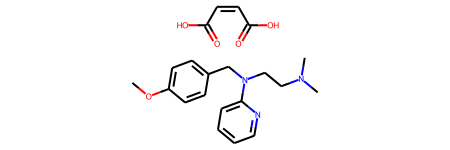

In [55]:
M1 = mol_list [0]
M1

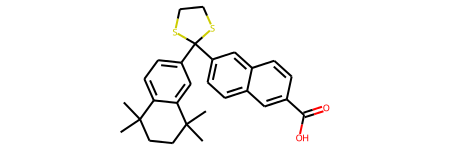

In [56]:
M2 = mol_list [1]
M2

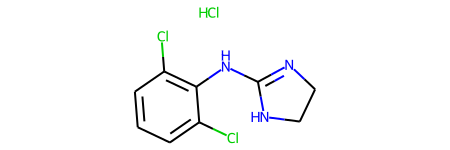

In [57]:
M3 = mol_list [2]
M3

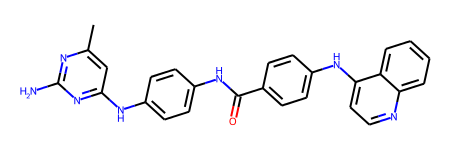

In [58]:
M4 = mol_list [3]
M4

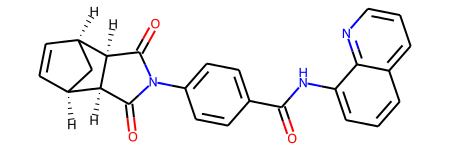

In [59]:
M5 = mol_list [4]
M5

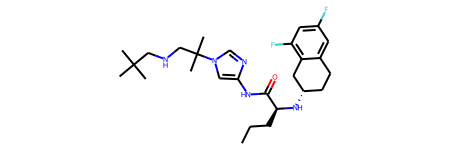

In [60]:
M6 = mol_list [5]
M6

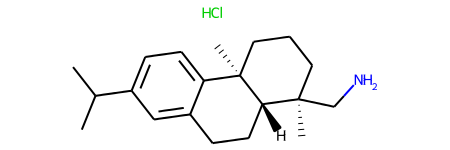

In [61]:
M7 = mol_list [6]
M7

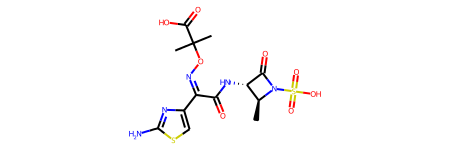

In [62]:
M8 = mol_list [7]
M8

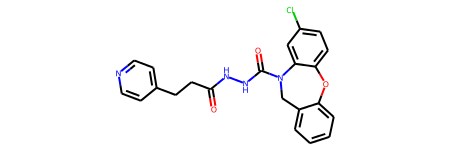

In [63]:
M9 = mol_list [8]
M9

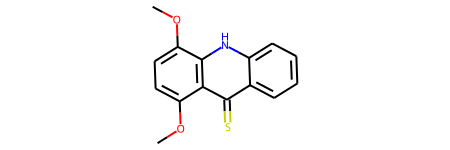

In [64]:
M10= mol_list [9]
M10

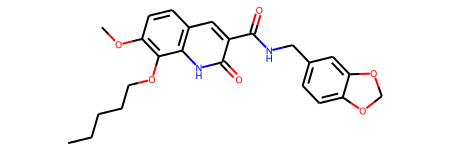

In [65]:
M11= mol_list [10]
M11

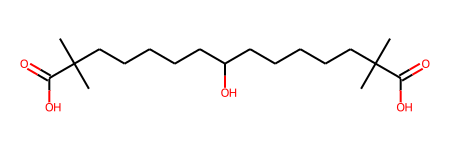

In [66]:
M12= mol_list [11]
M12

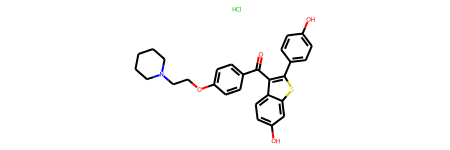

In [67]:
M13= mol_list [12]
M13

In [ ]:
M14= mol_list [13]
M14

In [ ]:
M15= mol_list [14]
M15

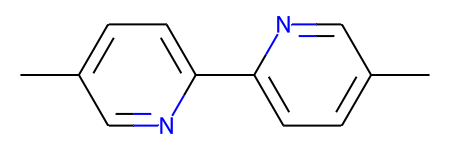

In [69]:
M16= mol_list [15]
M16

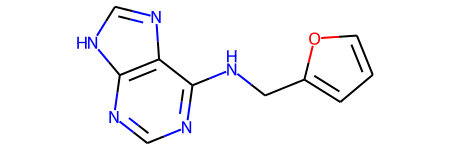

In [70]:
M17= mol_list [16]
M17

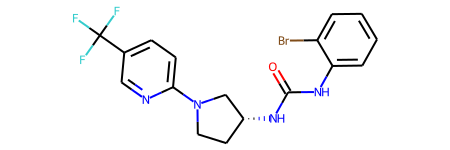

In [71]:
M18= mol_list [17]
M18

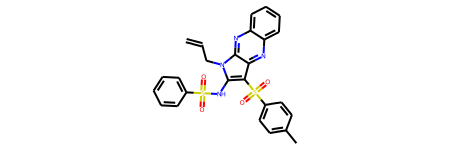

In [72]:
M19= mol_list [18]
M19

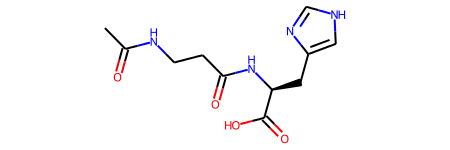

In [73]:
M20= mol_list [19]
M20

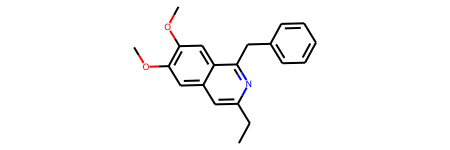

In [74]:
M21= mol_list [20]
M21

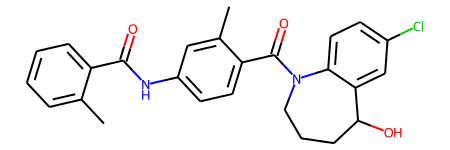

In [75]:
M22= mol_list [21]
M23

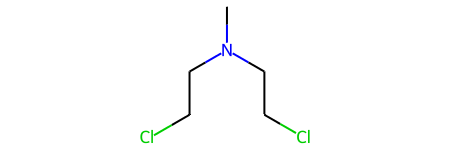

In [76]:
M23= mol_list [22]
M23

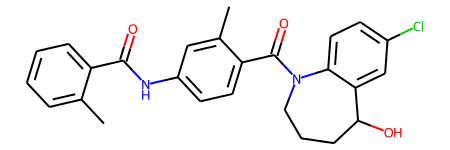

In [77]:
M24= mol_list [23]
M24

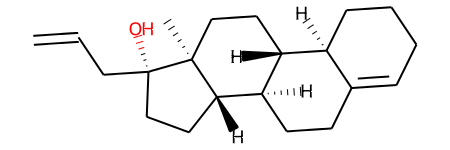

In [78]:
M25= mol_list [24]
M25

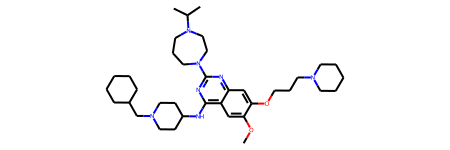

In [79]:
M26= mol_list [25]
M26

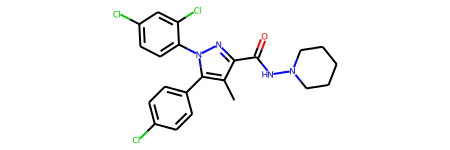

In [80]:
M27= mol_list [26]
M27

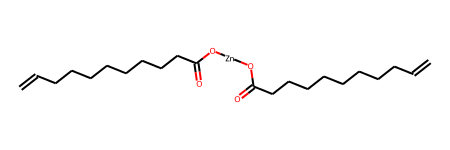

In [81]:
M28= mol_list [27]
M28

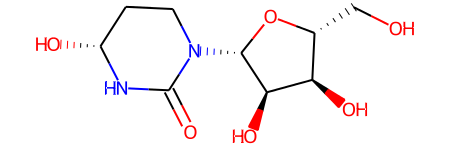

In [82]:
M29= mol_list [28]
M29

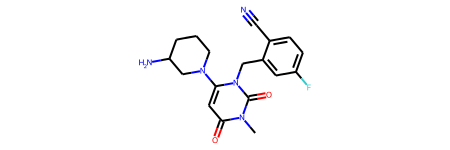

In [85]:
M30= mol_list [29]
M30

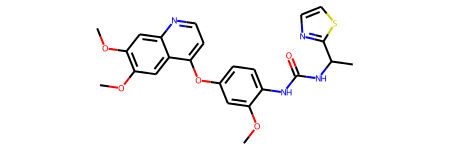

In [83]:
M31= mol_list [30]
M31

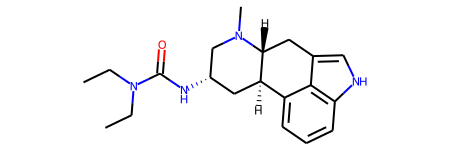

In [84]:
M32= mol_list [31]
M32

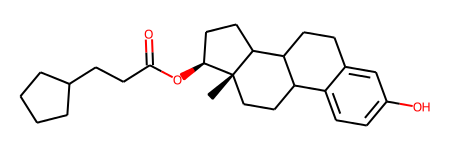

In [86]:
M33= mol_list [32]
M33

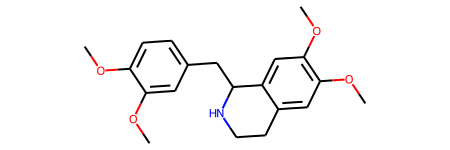

In [87]:
M34= mol_list [33]
M34

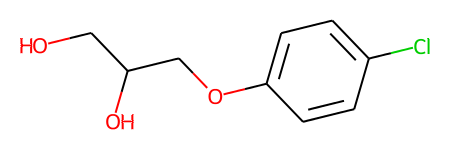

In [88]:
M35= mol_list [34]
M35

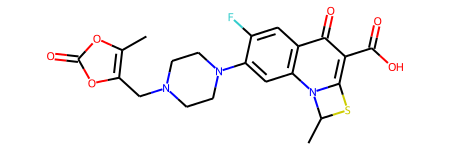

In [89]:
M36= mol_list [35]
M36

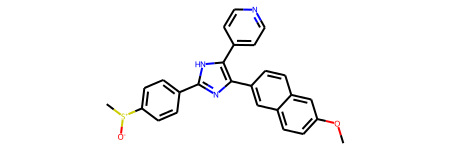

In [90]:
M37= mol_list [36]
M37

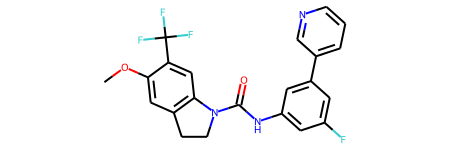

In [91]:
M38= mol_list [37]
M38


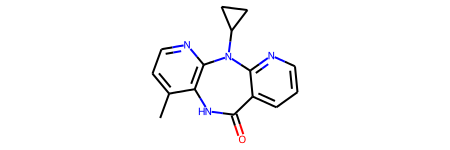

In [92]:
M39= mol_list [38]
M39

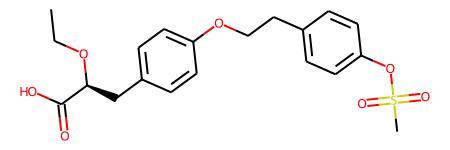

In [93]:
M40= mol_list [39]
M40

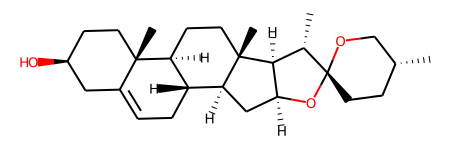

In [94]:
M41= mol_list [40]
M41

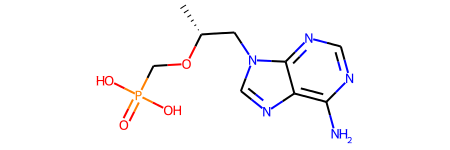

In [95]:
M42= mol_list [41]
M42

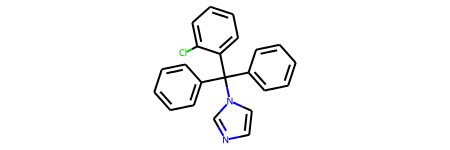

In [96]:
M43= mol_list [42]
M43

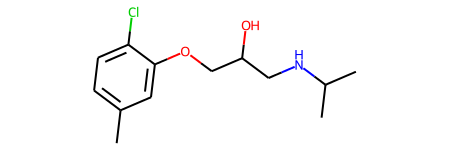

In [97]:
M44= mol_list [43]
M44

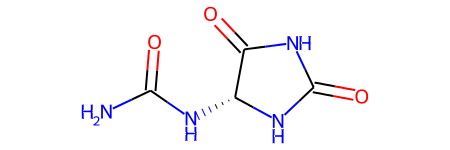

In [98]:
M45= mol_list [44]
M45

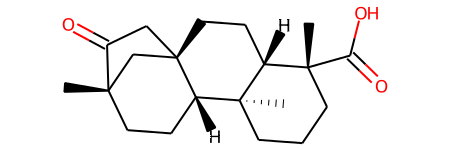

In [99]:
M46= mol_list [45]
M46

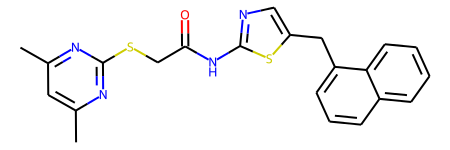

In [100]:
M47= mol_list [46]
M47

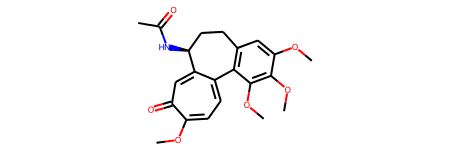

In [101]:
M48= mol_list [47]
M48

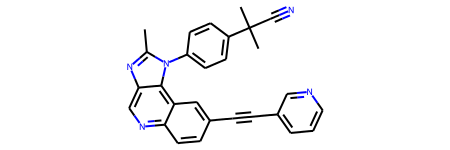

In [102]:
M49= mol_list [48]
M49

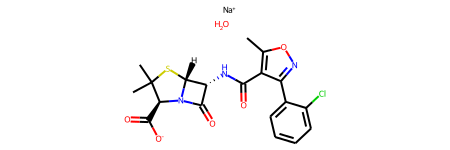

In [103]:
M50= mol_list [49]
M50

In [104]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[31,
 33,
 64,
 80,
 123,
 131,
 139,
 175,
 280,
 310,
 322,
 356,
 378,
 389,
 428,
 448,
 495,
 507,
 508,
 510,
 512,
 604,
 650,
 652,
 663,
 670,
 693,
 694,
 695,
 718,
 726,
 730,
 735,
 781,
 807,
 831,
 841,
 842,
 849,
 881,
 893,
 894,
 927,
 976,
 1007,
 1008]

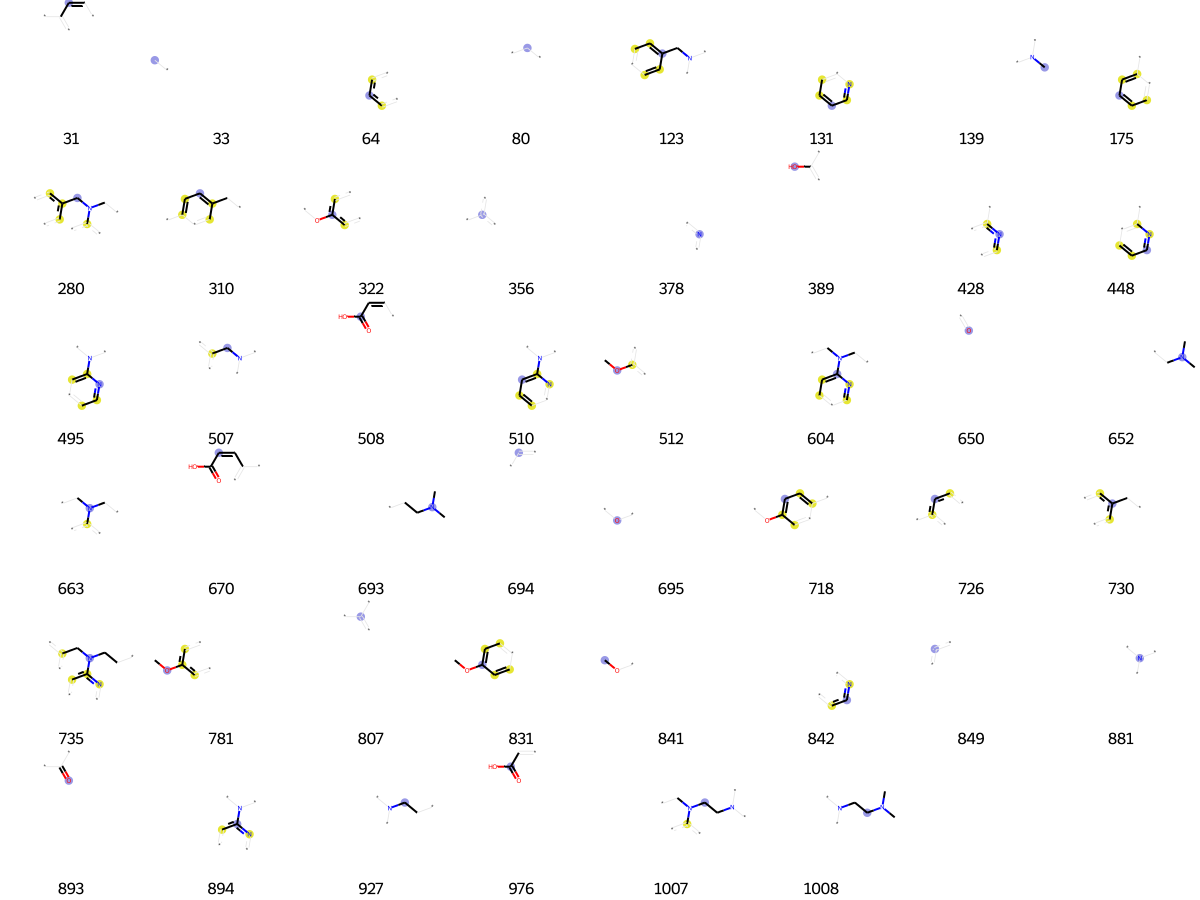

In [105]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [106]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[31,
 33,
 64,
 80,
 123,
 131,
 139,
 175,
 280,
 310,
 322,
 356,
 378,
 389,
 428,
 448,
 495,
 507,
 508,
 510,
 512,
 604,
 650,
 652,
 663,
 670,
 693,
 694,
 695,
 718,
 726,
 730,
 735,
 781,
 807,
 831,
 841,
 842,
 849,
 881,
 893,
 894,
 927,
 976,
 1007,
 1008]

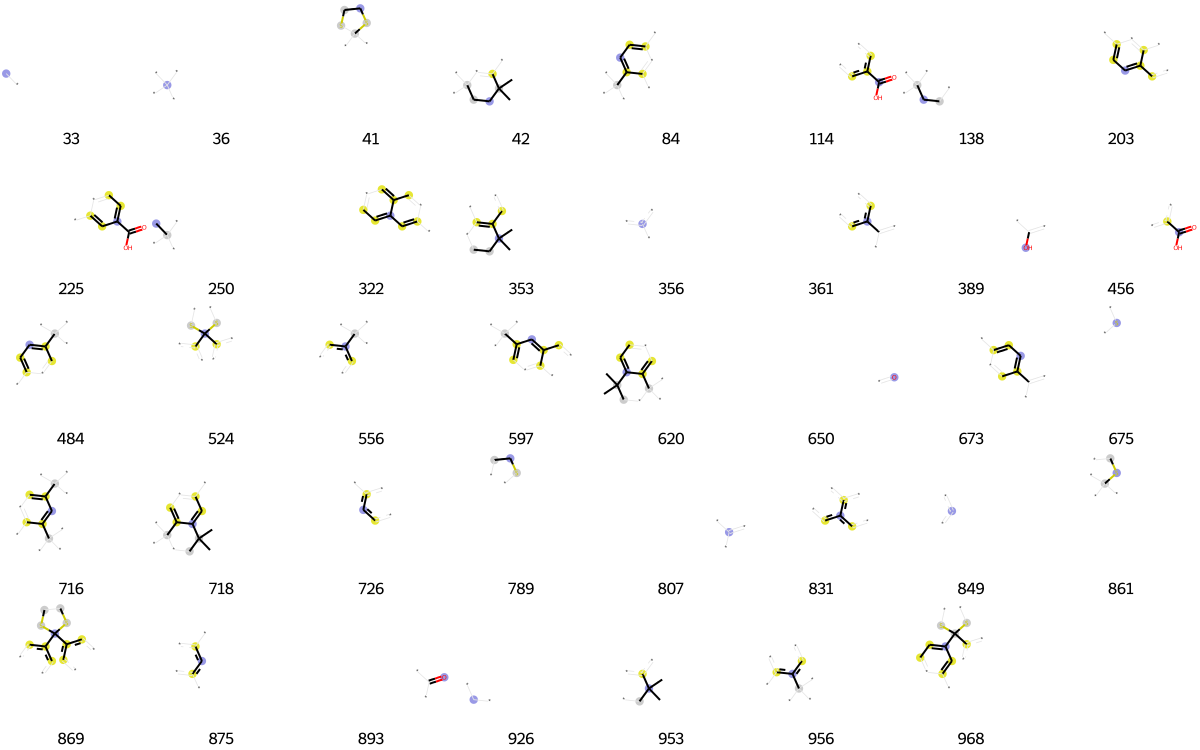

In [107]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [108]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 59,
 64,
 89,
 90,
 128,
 256,
 272,
 305,
 313,
 356,
 366,
 378,
 381,
 383,
 425,
 491,
 514,
 555,
 561,
 659,
 726,
 800,
 836,
 842,
 849,
 881,
 926,
 974]

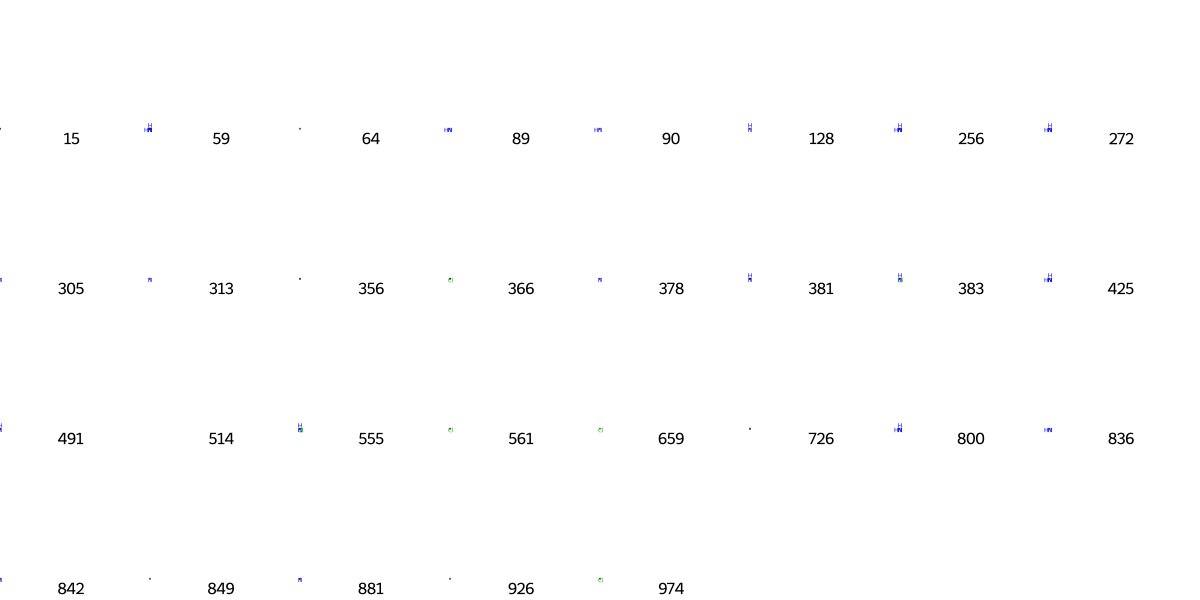

In [109]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [110]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 53,
 64,
 73,
 75,
 103,
 128,
 147,
 175,
 191,
 200,
 208,
 211,
 216,
 282,
 289,
 333,
 356,
 361,
 378,
 409,
 428,
 433,
 486,
 491,
 493,
 496,
 500,
 549,
 613,
 629,
 641,
 650,
 673,
 698,
 707,
 726,
 771,
 787,
 792,
 807,
 819,
 831,
 842,
 843,
 849,
 875,
 893,
 898,
 954,
 975,
 984]

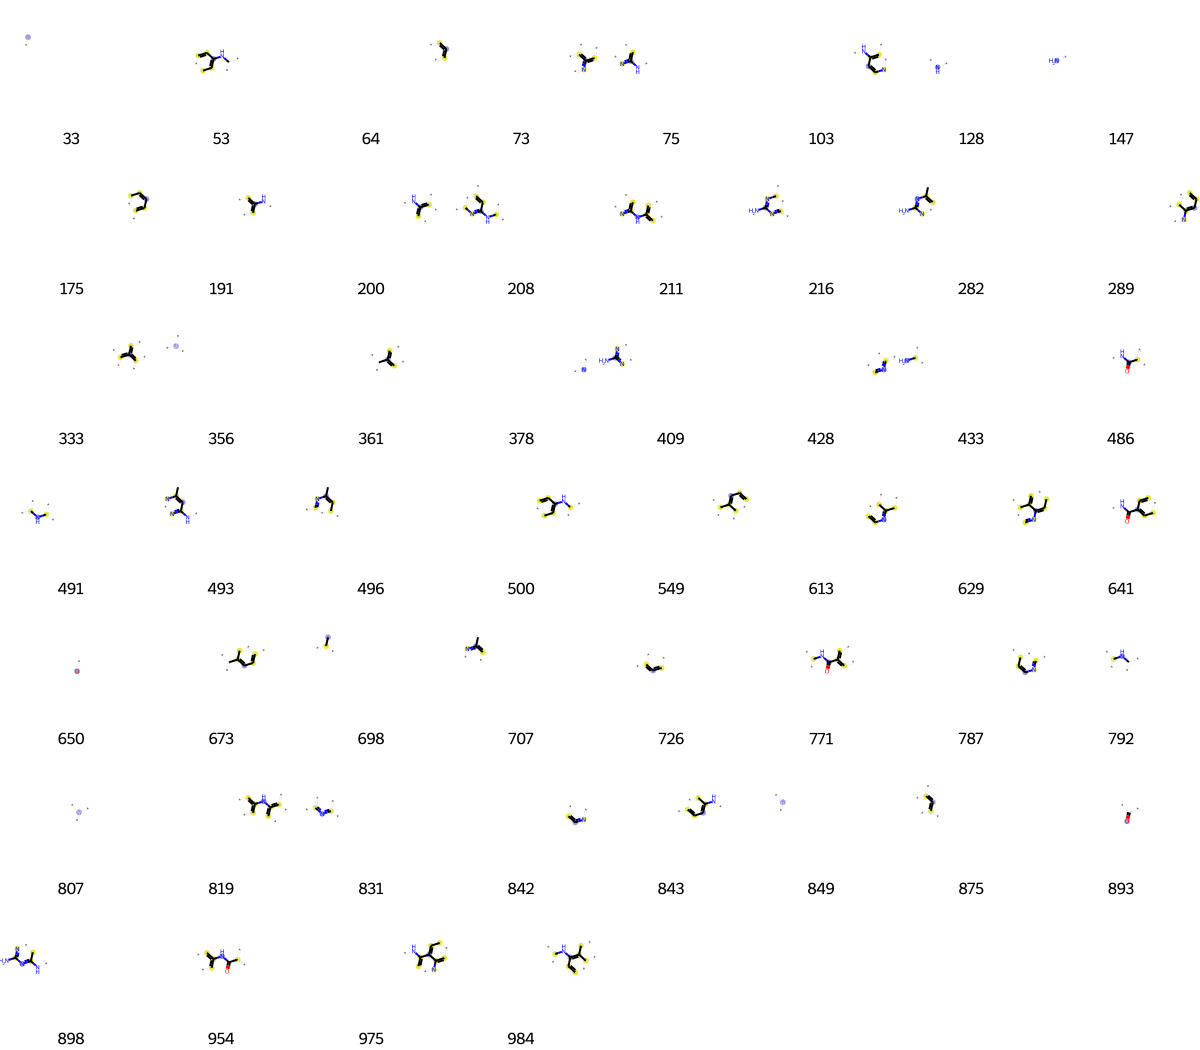

In [111]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [112]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[5,
 15,
 19,
 59,
 63,
 64,
 128,
 152,
 200,
 233,
 268,
 313,
 314,
 338,
 356,
 361,
 365,
 378,
 428,
 433,
 448,
 449,
 486,
 501,
 641,
 650,
 662,
 672,
 673,
 700,
 726,
 738,
 771,
 792,
 801,
 807,
 831,
 842,
 848,
 849,
 892,
 893,
 915,
 926,
 935,
 947,
 986,
 1019]

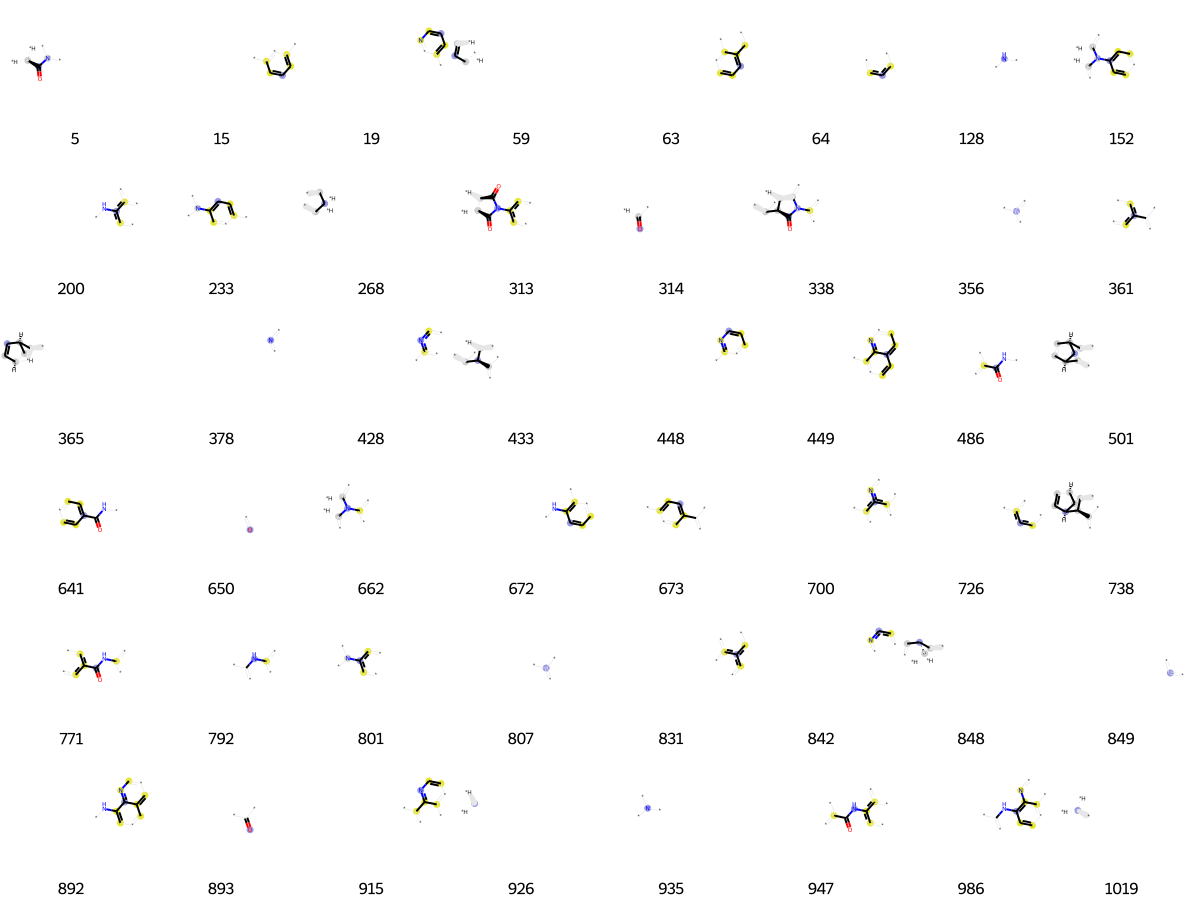

In [113]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [114]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 12,
 18,
 27,
 33,
 75,
 78,
 80,
 90,
 93,
 101,
 114,
 128,
 138,
 160,
 167,
 212,
 231,
 257,
 294,
 301,
 356,
 361,
 378,
 392,
 404,
 428,
 439,
 453,
 464,
 497,
 559,
 573,
 610,
 636,
 646,
 650,
 697,
 699,
 713,
 714,
 736,
 739,
 754,
 767,
 780,
 792,
 794,
 800,
 801,
 807,
 816,
 817,
 849,
 871,
 875,
 893,
 904,
 926,
 932,
 935,
 978,
 985,
 997,
 1002,
 1004,
 1009,
 1019]

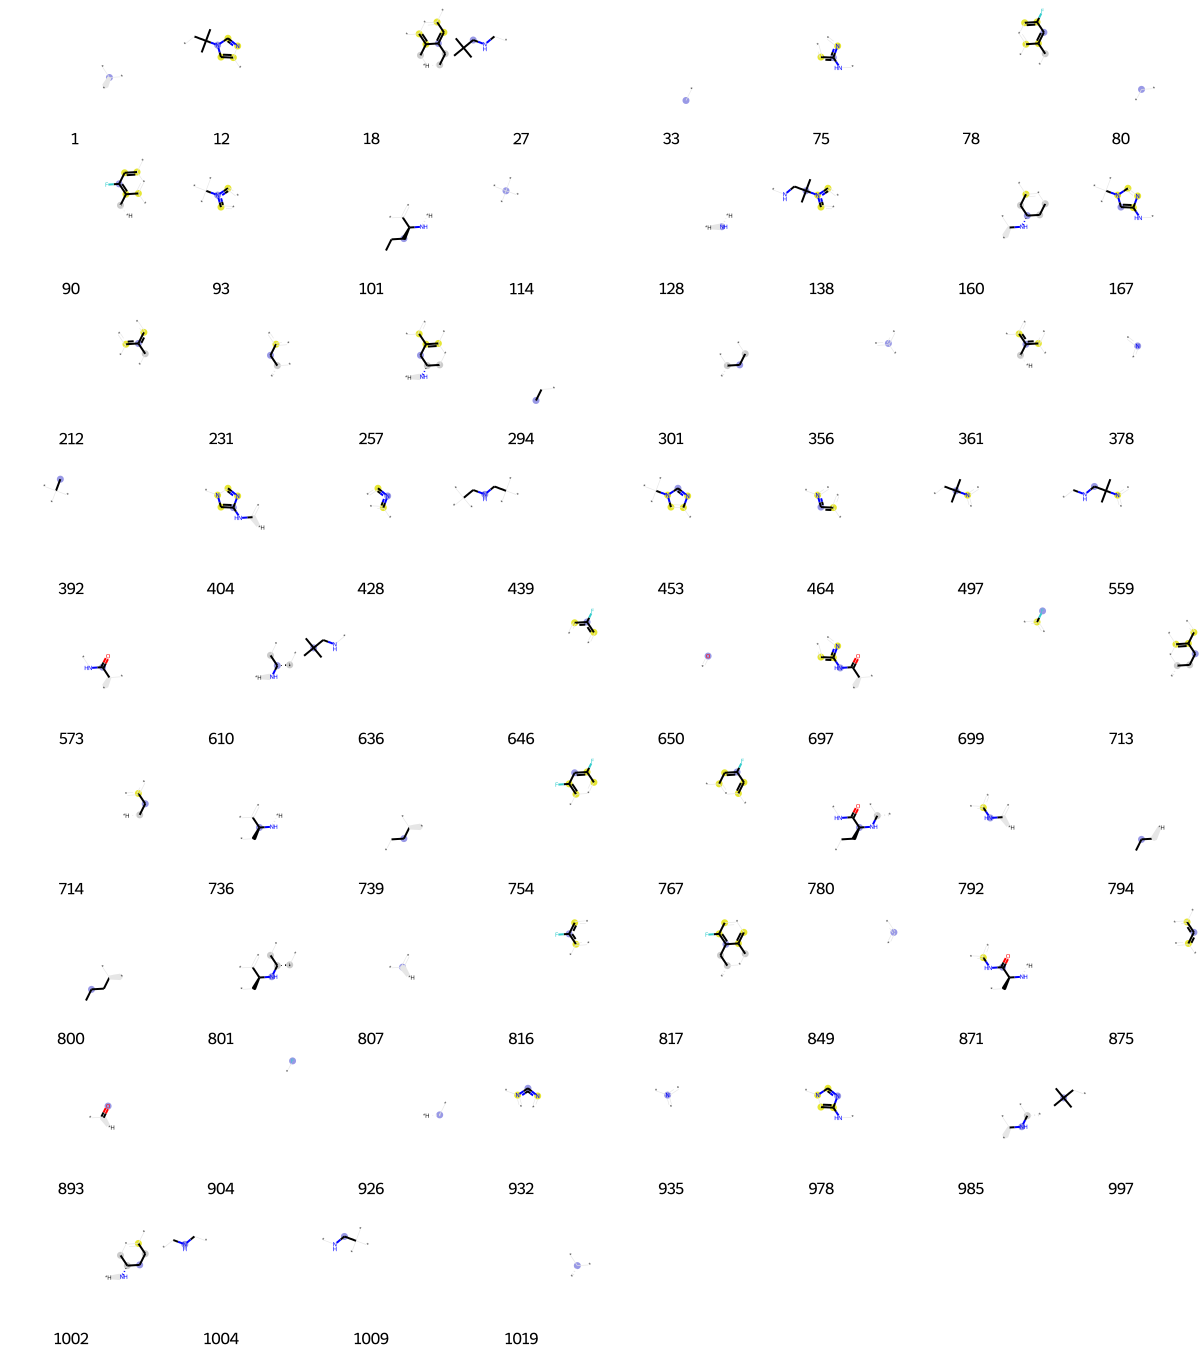

In [115]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [116]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 4,
 33,
 36,
 80,
 84,
 104,
 138,
 147,
 178,
 212,
 250,
 283,
 301,
 310,
 339,
 341,
 356,
 360,
 394,
 469,
 478,
 514,
 583,
 598,
 670,
 713,
 714,
 726,
 778,
 780,
 788,
 829,
 849,
 860,
 875,
 886,
 906,
 926,
 956,
 981,
 1004,
 1019]

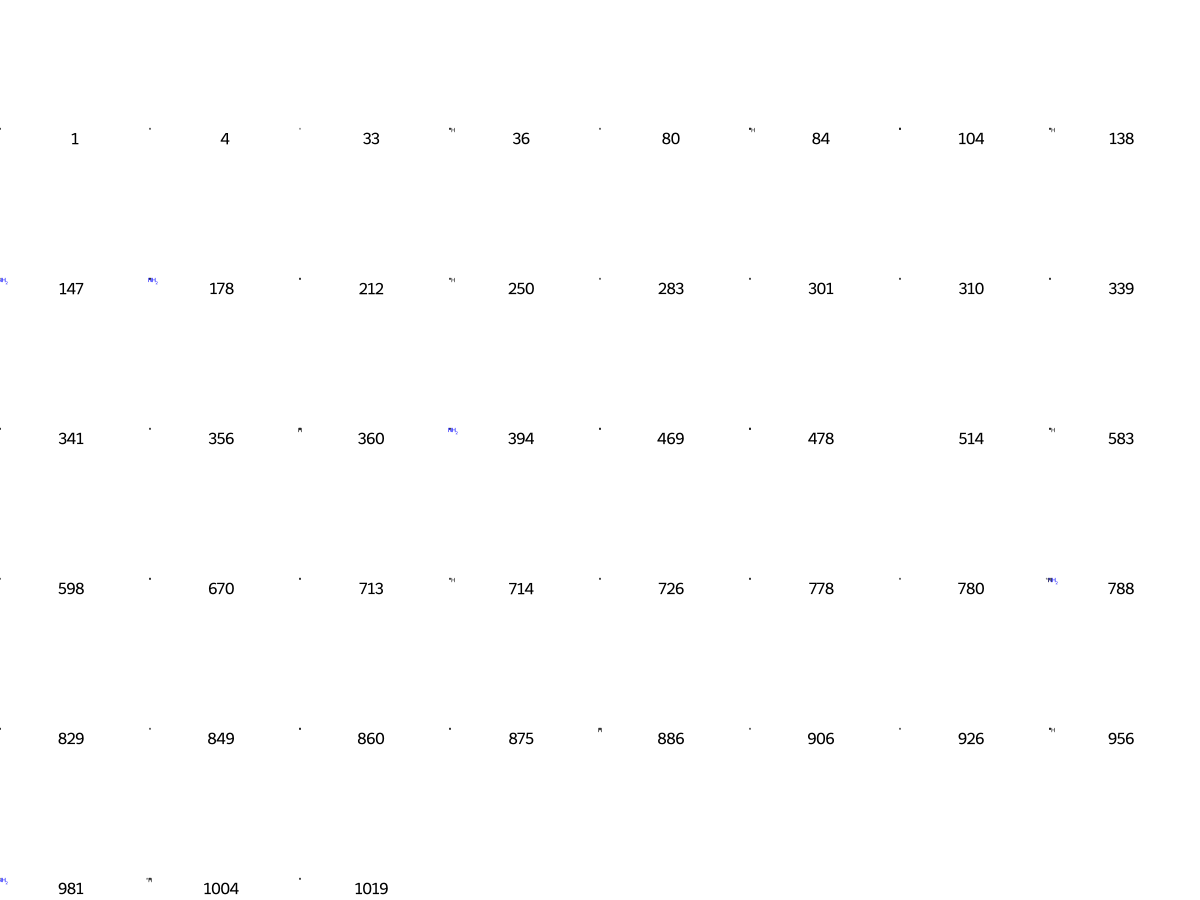

In [117]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [118]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[5,
 33,
 75,
 114,
 128,
 147,
 150,
 158,
 183,
 186,
 218,
 228,
 233,
 235,
 240,
 285,
 314,
 334,
 350,
 356,
 378,
 387,
 389,
 392,
 431,
 433,
 440,
 452,
 455,
 481,
 485,
 523,
 543,
 552,
 570,
 592,
 637,
 640,
 650,
 653,
 675,
 695,
 725,
 792,
 807,
 831,
 849,
 855,
 893,
 935,
 951,
 953,
 963,
 997,
 1019]

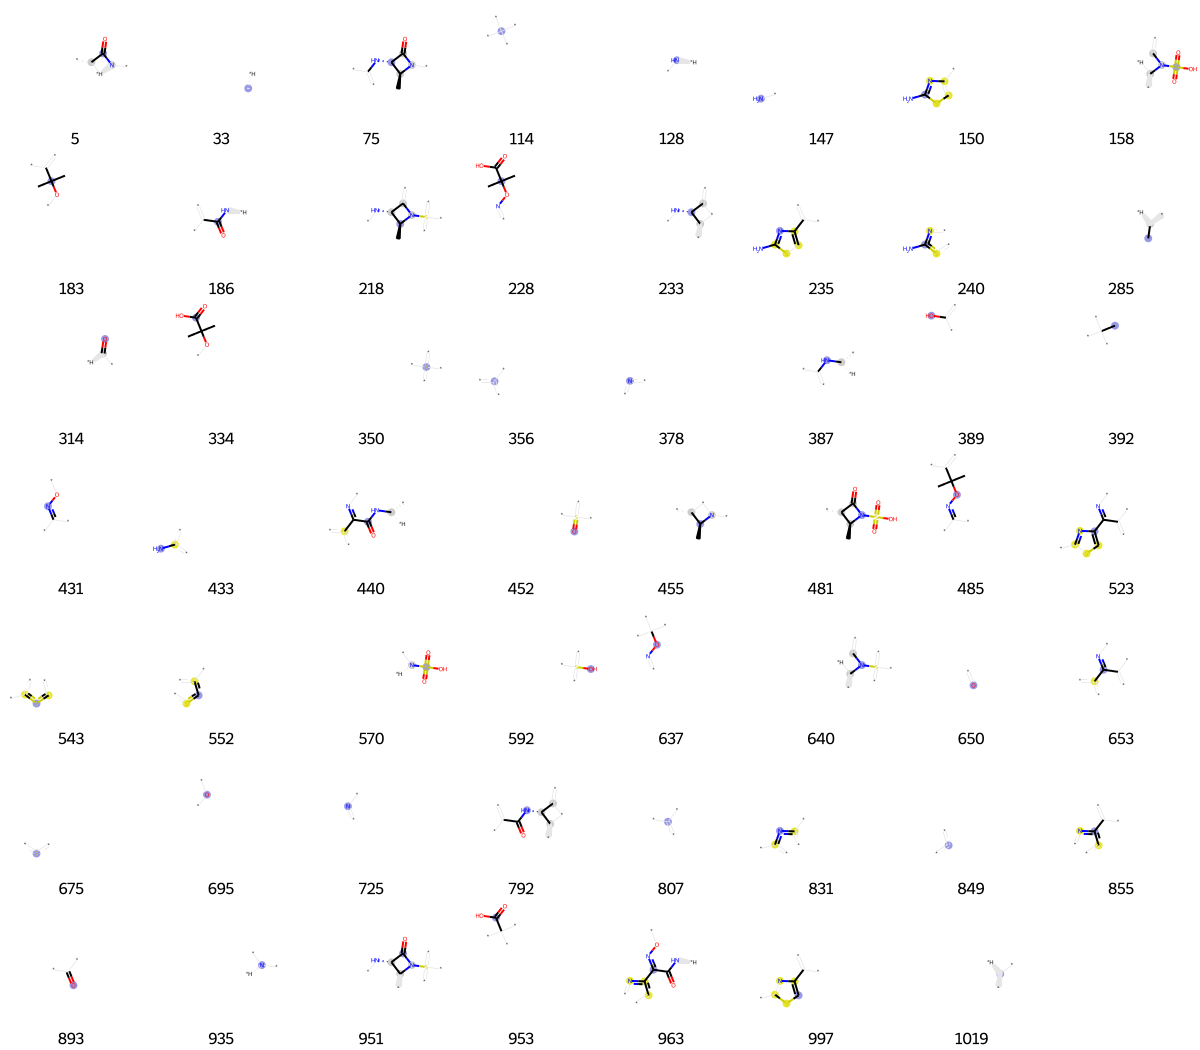

In [119]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [120]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[11,
 21,
 24,
 41,
 64,
 66,
 80,
 128,
 144,
 165,
 175,
 184,
 212,
 216,
 218,
 219,
 248,
 271,
 281,
 356,
 363,
 378,
 383,
 457,
 493,
 536,
 540,
 561,
 579,
 601,
 650,
 656,
 659,
 684,
 697,
 726,
 730,
 745,
 759,
 786,
 807,
 816,
 842,
 849,
 875,
 881,
 884,
 893,
 914,
 922,
 926,
 935,
 1012]

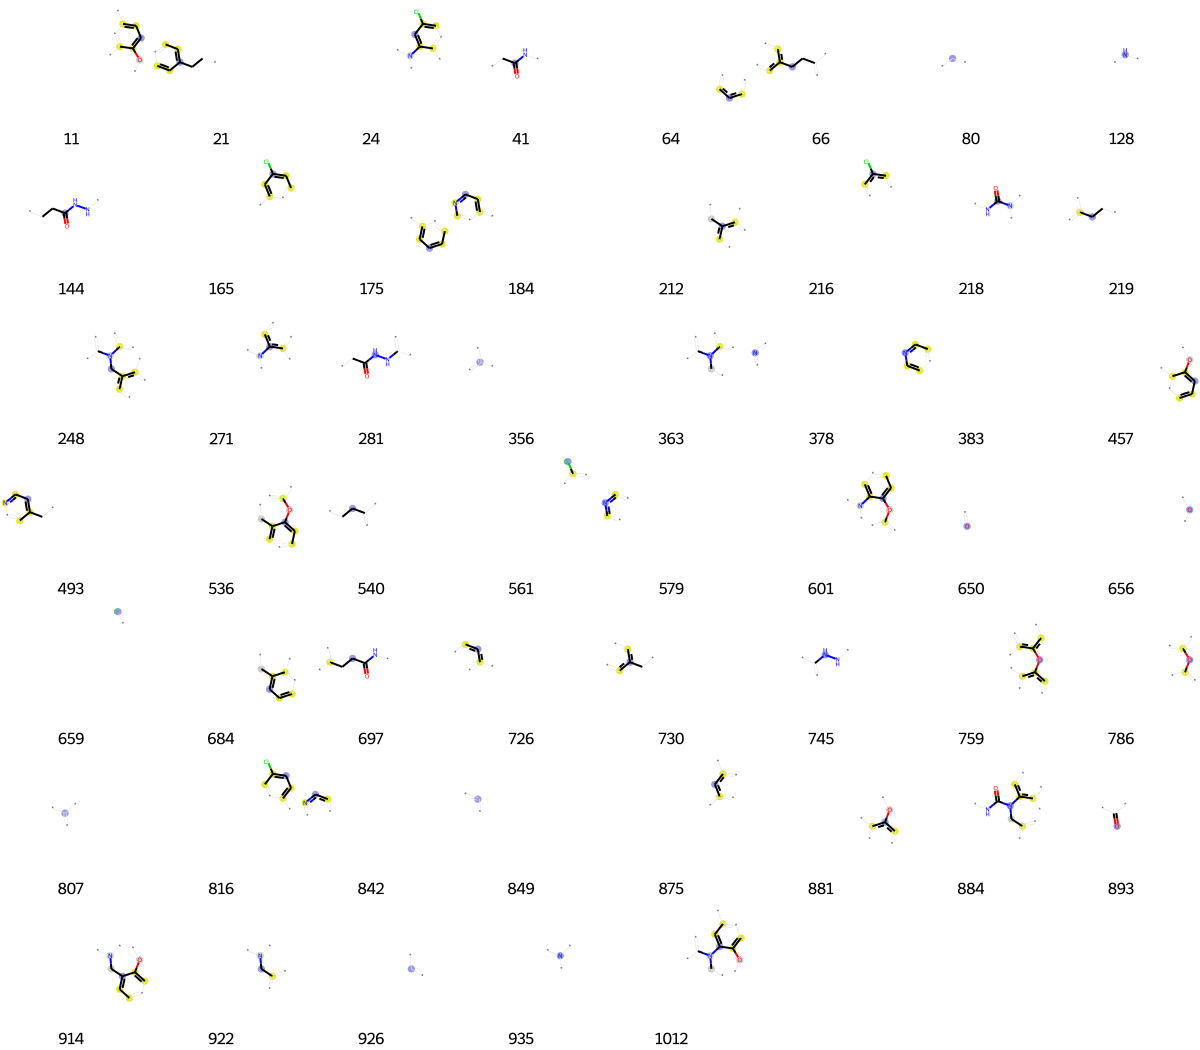

In [121]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [122]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[33,
 64,
 90,
 94,
 97,
 119,
 137,
 175,
 215,
 223,
 230,
 249,
 275,
 309,
 333,
 356,
 455,
 506,
 512,
 549,
 692,
 693,
 695,
 721,
 726,
 759,
 768,
 841,
 849,
 946,
 960]

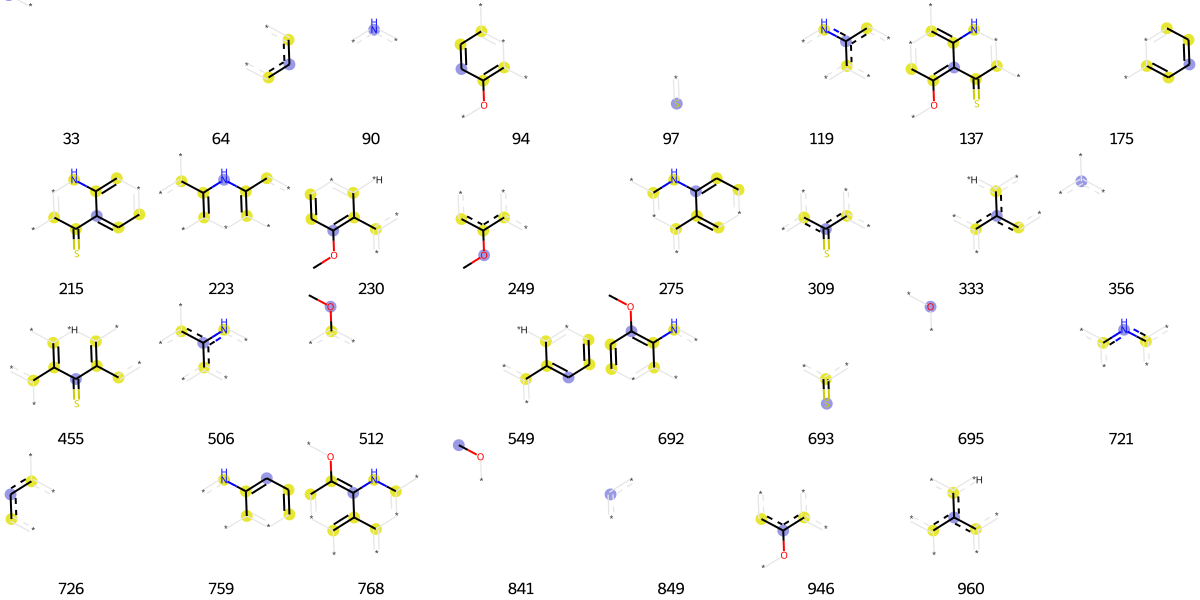

In [123]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [126]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[11,
 13,
 27,
 33,
 80,
 90,
 94,
 115,
 128,
 197,
 203,
 225,
 249,
 255,
 293,
 294,
 310,
 314,
 325,
 328,
 333,
 356,
 360,
 420,
 428,
 441,
 486,
 490,
 506,
 512,
 549,
 591,
 613,
 623,
 650,
 656,
 661,
 695,
 697,
 721,
 726,
 730,
 738,
 750,
 755,
 776,
 794,
 807,
 813,
 831,
 839,
 841,
 846,
 849,
 875,
 881,
 887,
 893,
 926,
 946,
 967,
 994]

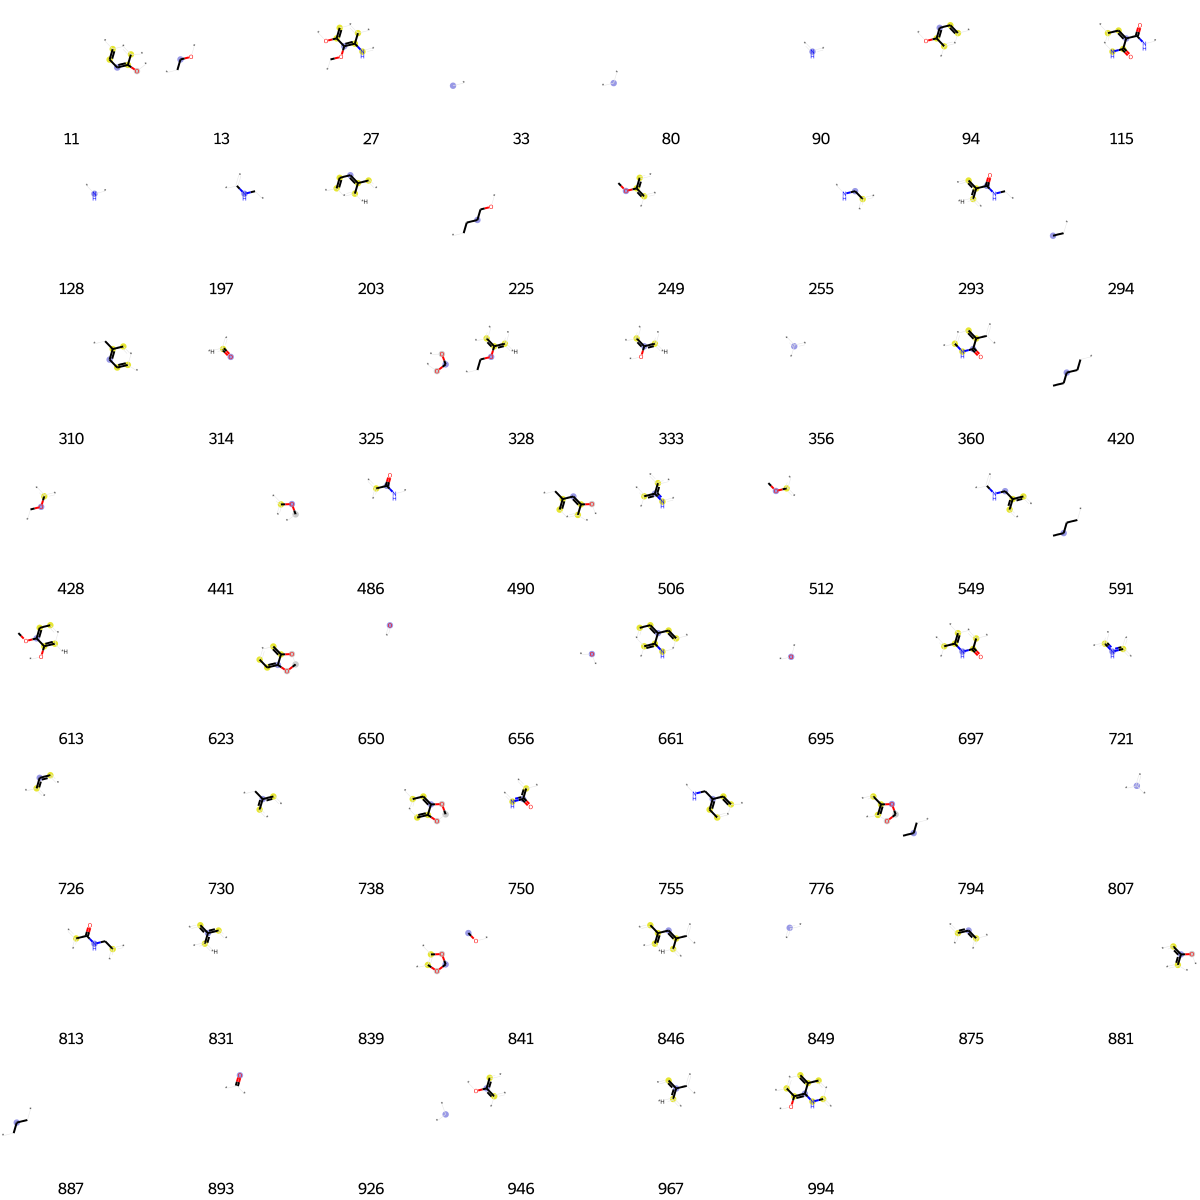

In [127]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [129]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 33,
 80,
 87,
 114,
 119,
 227,
 259,
 284,
 389,
 392,
 588,
 619,
 650,
 736,
 739,
 807,
 860,
 887,
 889,
 893,
 953,
 964,
 1014]

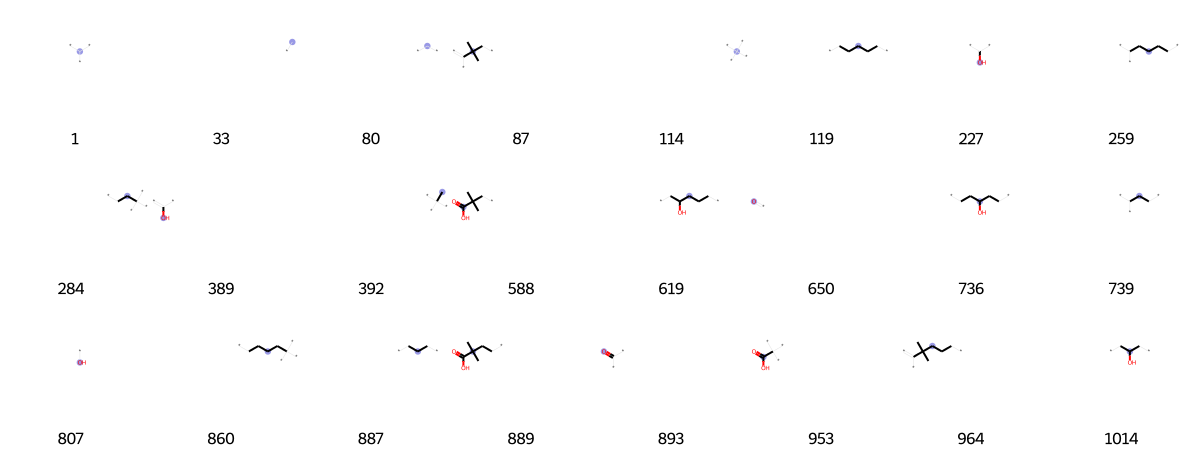

In [130]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [131]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[2,
 4,
 9,
 10,
 13,
 24,
 80,
 102,
 121,
 136,
 162,
 289,
 302,
 304,
 322,
 333,
 356,
 361,
 381,
 398,
 428,
 456,
 458,
 510,
 514,
 533,
 578,
 586,
 650,
 673,
 675,
 695,
 709,
 718,
 726,
 745,
 751,
 754,
 767,
 807,
 808,
 845,
 849,
 875,
 876,
 885,
 893,
 896,
 905,
 926,
 935,
 974]

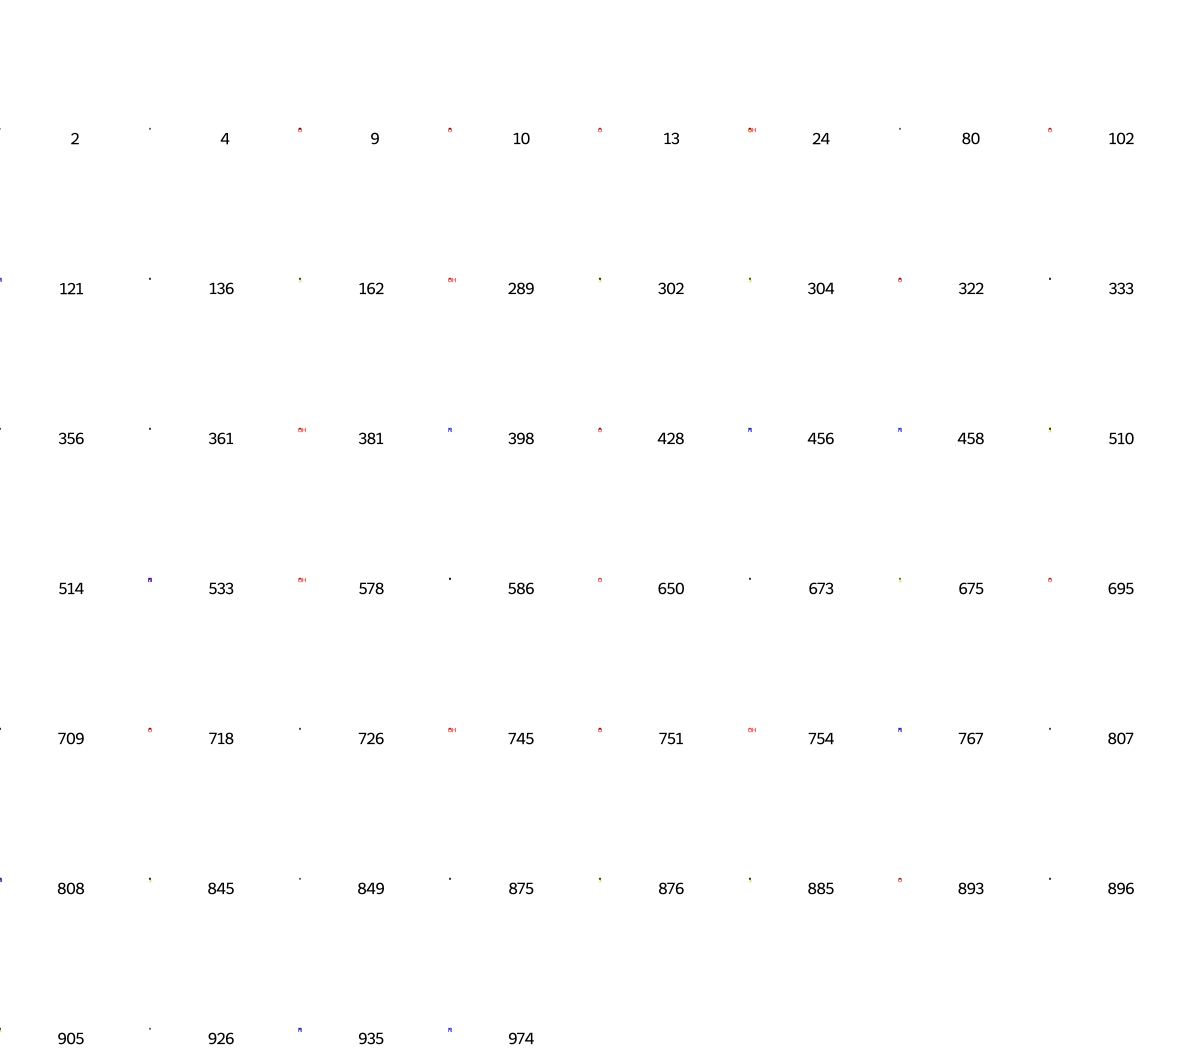

In [132]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [147]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[119,
 136,
 162,
 184,
 302,
 356,
 378,
 383,
 552,
 579,
 624,
 675,
 723,
 726,
 780,
 793,
 842,
 849,
 876]

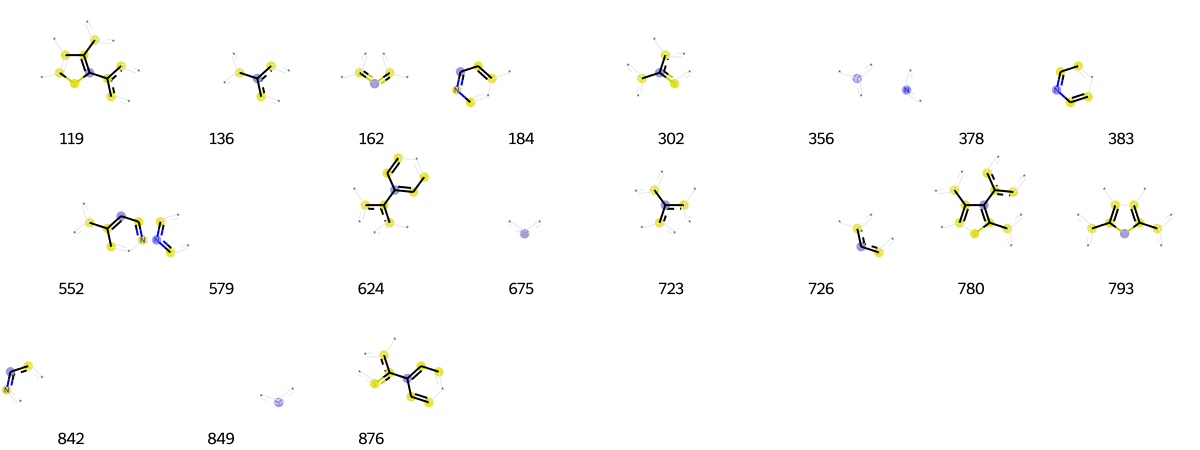

In [148]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [134]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1, 33, 235, 266, 356, 378, 428, 511, 601, 626, 698, 726, 799, 802, 849, 980]

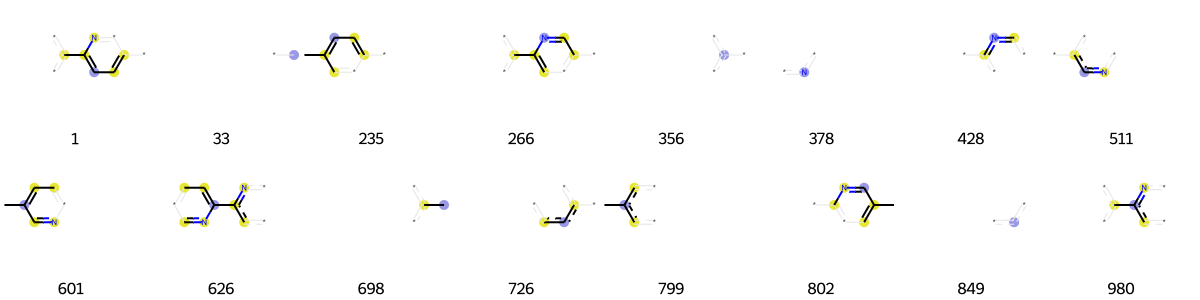

In [135]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [136]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1, 33, 235, 266, 356, 378, 428, 511, 601, 626, 698, 726, 799, 802, 849, 980]

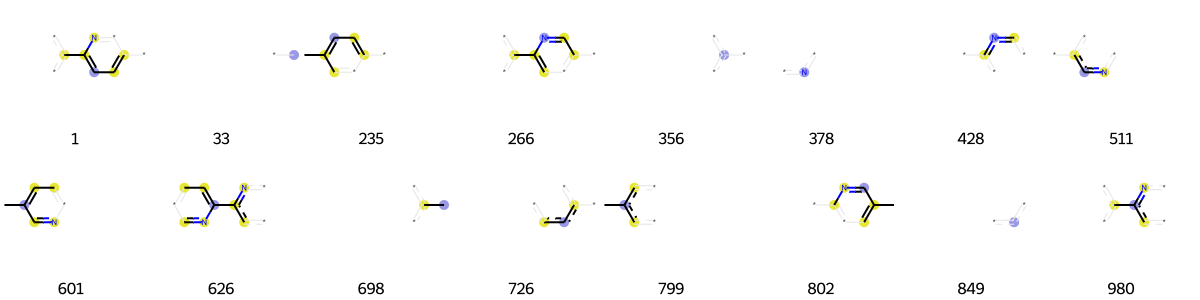

In [137]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [138]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[64,
 80,
 90,
 128,
 143,
 147,
 209,
 255,
 298,
 343,
 356,
 378,
 392,
 428,
 442,
 474,
 488,
 489,
 494,
 514,
 614,
 656,
 700,
 708,
 713,
 726,
 786,
 787,
 806,
 834,
 849,
 859,
 902,
 910,
 933,
 983]

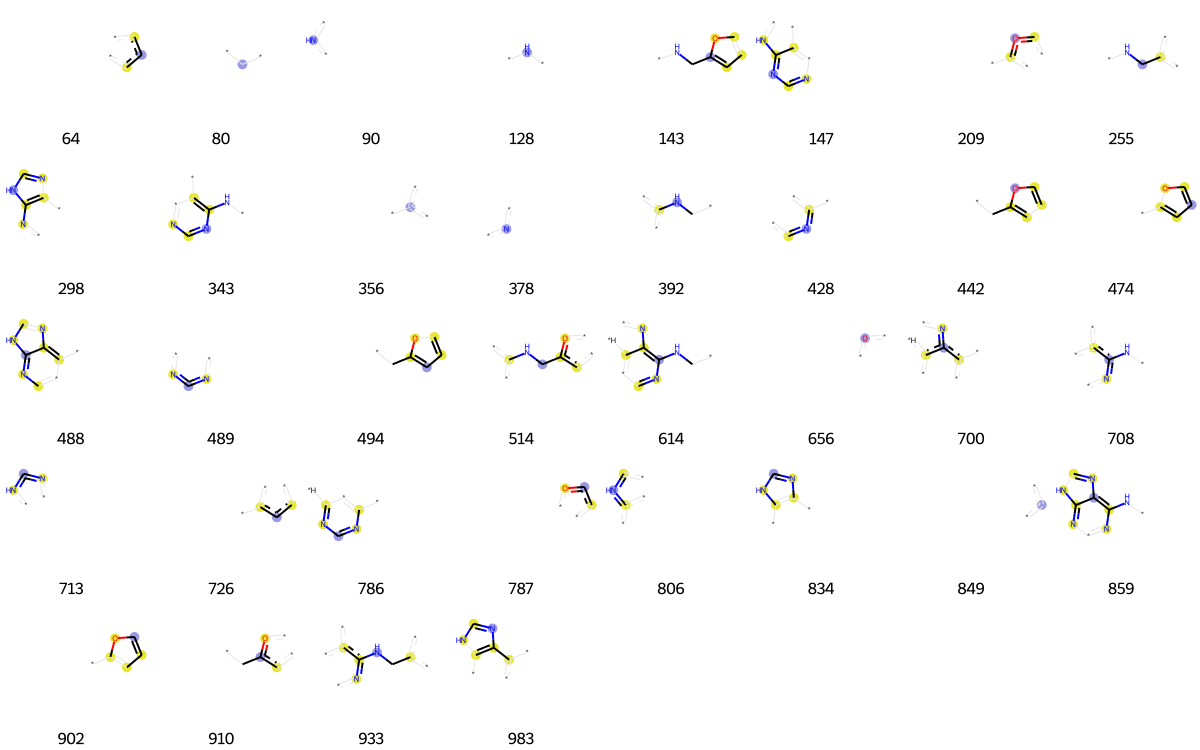

In [139]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [140]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[22,
 57,
 64,
 114,
 128,
 144,
 175,
 200,
 217,
 236,
 301,
 335,
 346,
 356,
 378,
 387,
 393,
 407,
 410,
 428,
 429,
 433,
 456,
 511,
 527,
 573,
 586,
 607,
 610,
 626,
 635,
 641,
 650,
 672,
 712,
 726,
 728,
 739,
 792,
 807,
 809,
 833,
 849,
 879,
 893,
 904,
 926,
 935,
 965,
 993,
 1018,
 1019]

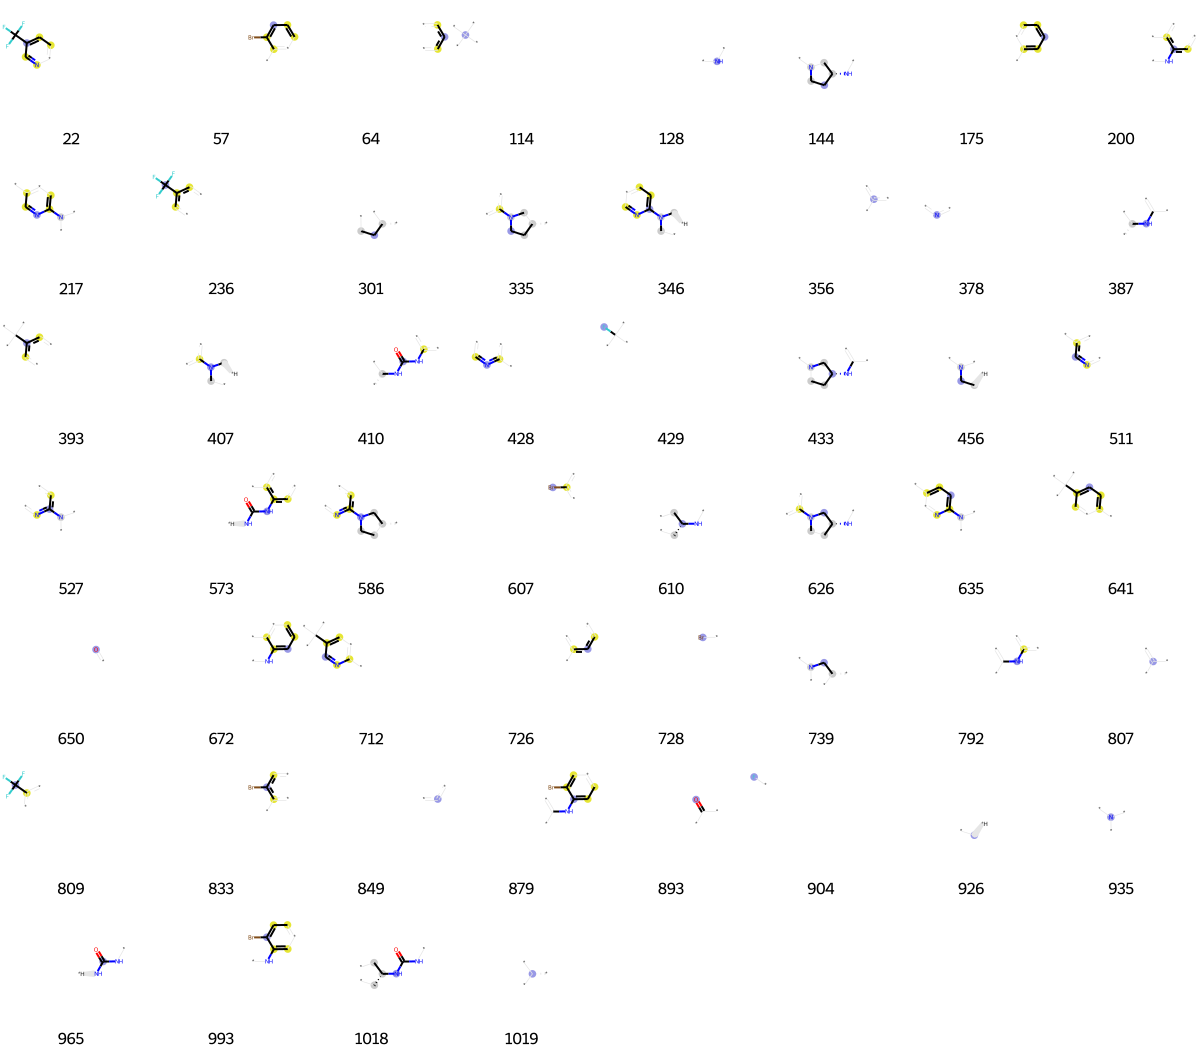

In [141]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [142]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 33,
 42,
 45,
 64,
 73,
 80,
 109,
 128,
 160,
 175,
 235,
 244,
 246,
 257,
 289,
 319,
 342,
 350,
 356,
 378,
 389,
 400,
 405,
 439,
 452,
 479,
 502,
 547,
 575,
 621,
 641,
 650,
 672,
 694,
 698,
 700,
 715,
 726,
 796,
 799,
 802,
 831,
 849,
 870,
 883,
 896,
 935,
 940,
 974,
 1018,
 1021]

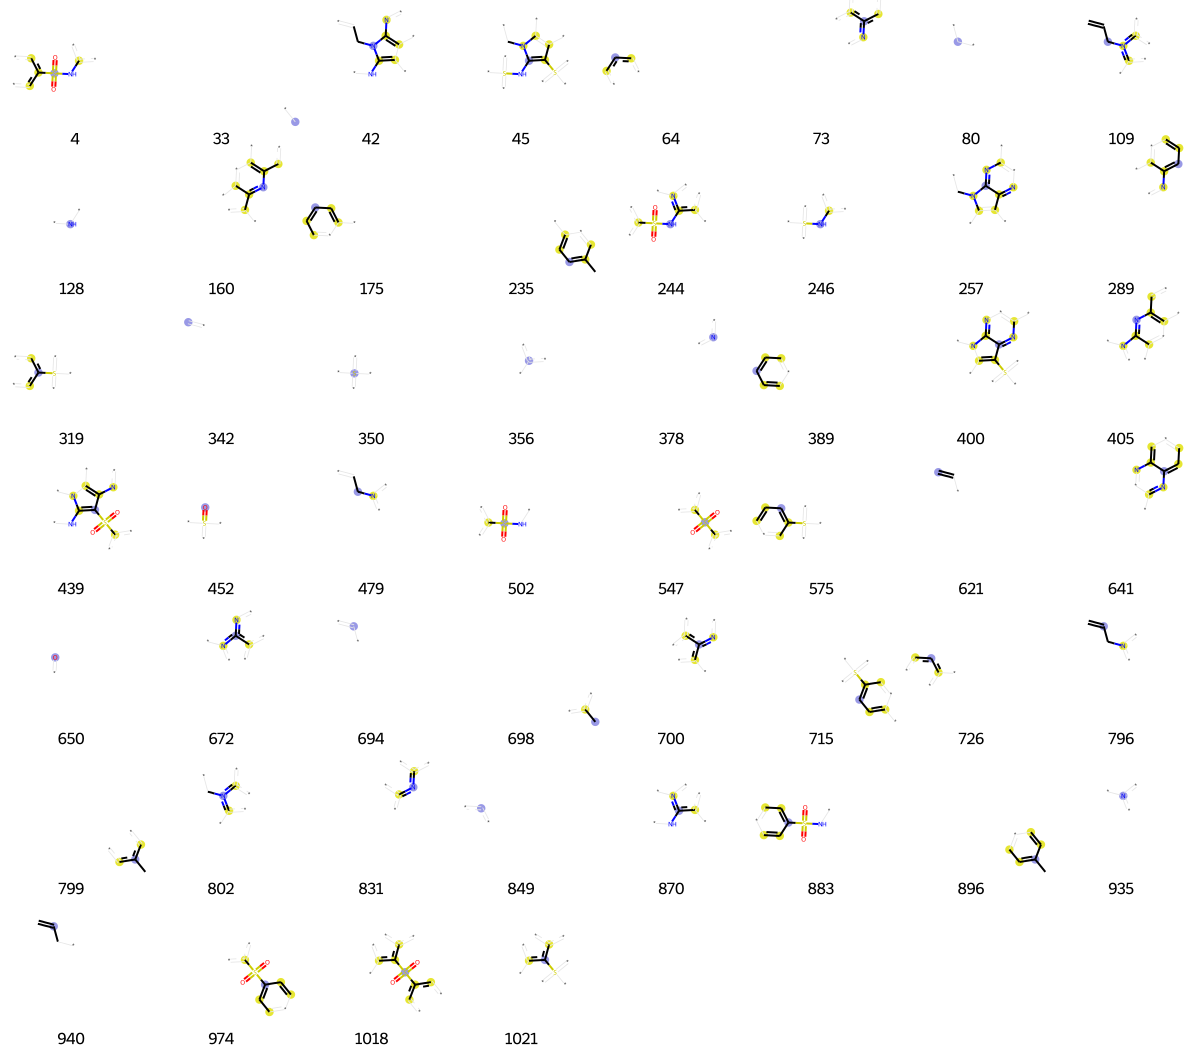

In [143]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [151]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 33,
 41,
 79,
 80,
 90,
 117,
 121,
 128,
 197,
 220,
 242,
 245,
 356,
 363,
 378,
 389,
 425,
 428,
 540,
 575,
 600,
 609,
 625,
 650,
 667,
 713,
 724,
 731,
 734,
 736,
 807,
 820,
 849,
 851,
 855,
 875,
 893,
 895,
 931,
 1017]

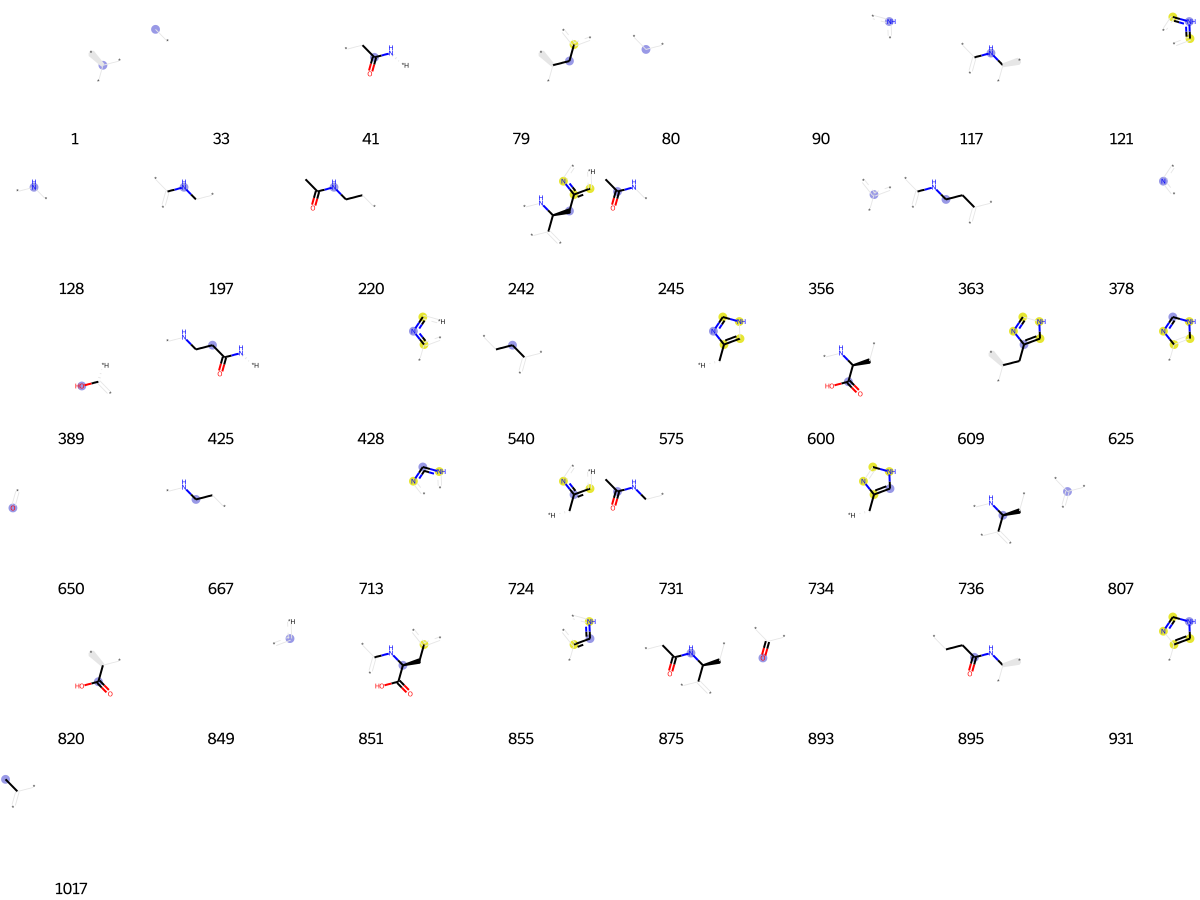

In [152]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [153]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 39,
 42,
 64,
 80,
 118,
 175,
 197,
 221,
 249,
 294,
 333,
 356,
 378,
 389,
 391,
 406,
 512,
 624,
 681,
 695,
 724,
 726,
 730,
 753,
 775,
 810,
 831,
 841,
 849,
 873,
 875,
 910,
 917,
 946]

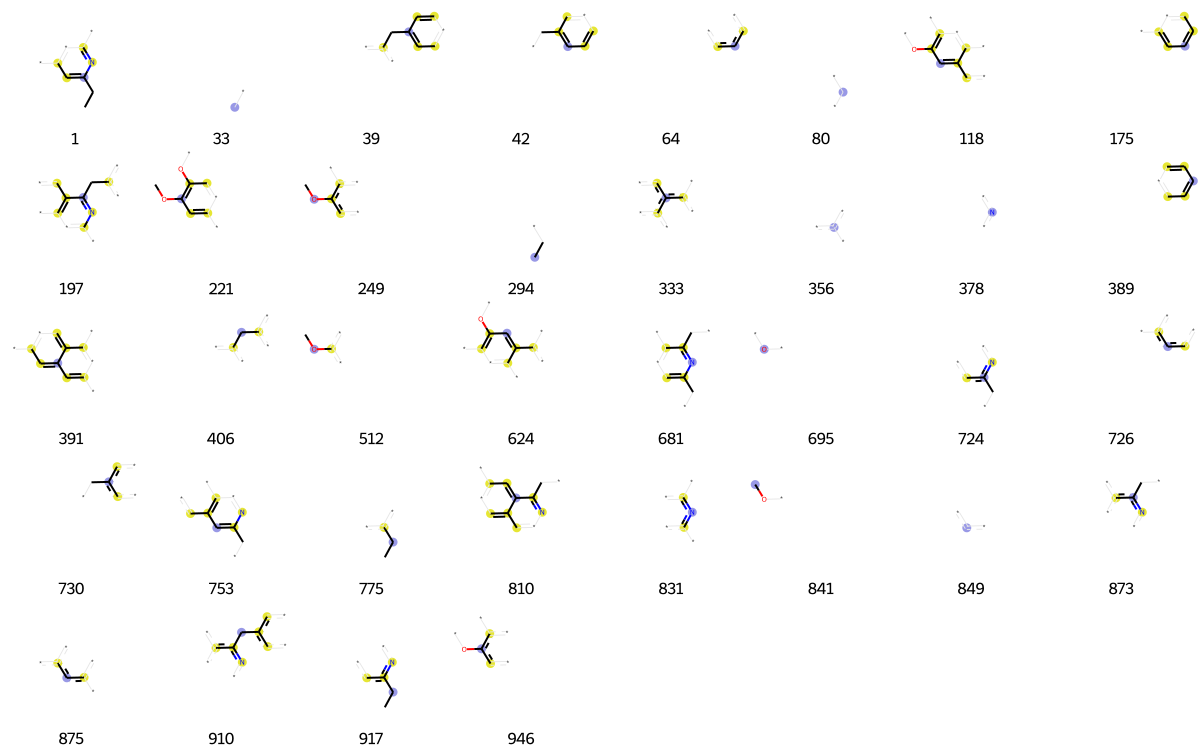

In [154]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [155]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 41,
 46,
 80,
 86,
 102,
 128,
 192,
 216,
 301,
 322,
 356,
 387,
 428,
 561,
 610,
 631,
 650,
 659,
 695,
 718,
 726,
 807,
 809,
 816,
 849,
 863,
 893,
 926,
 980,
 1019]

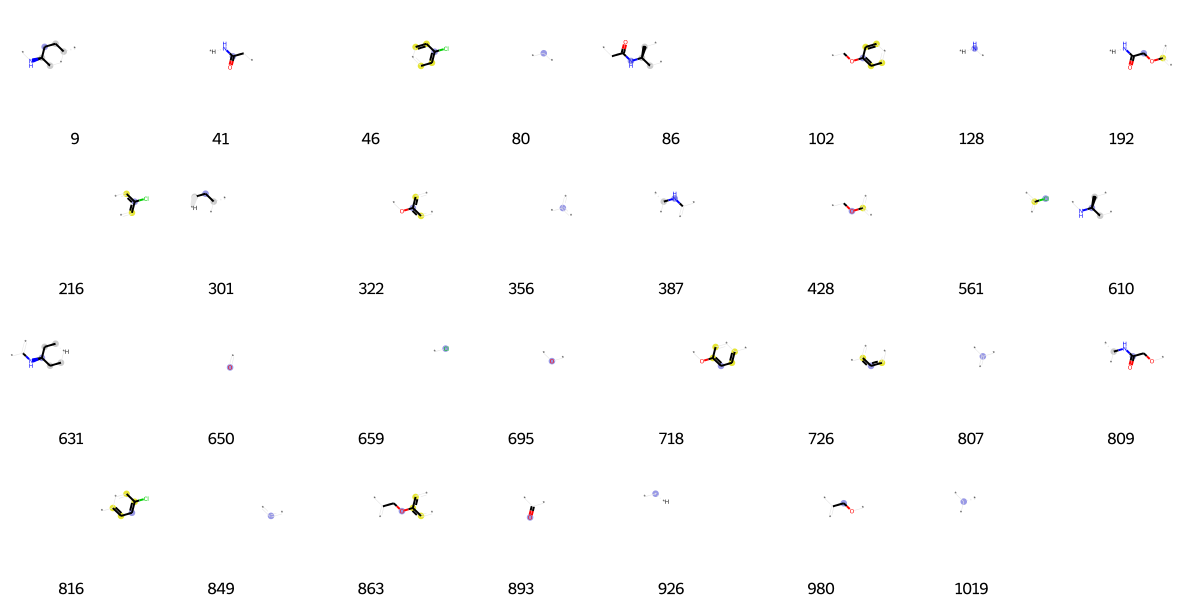

In [156]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [157]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[4, 33, 80, 85, 139, 212, 432, 659, 677, 881, 890, 927]

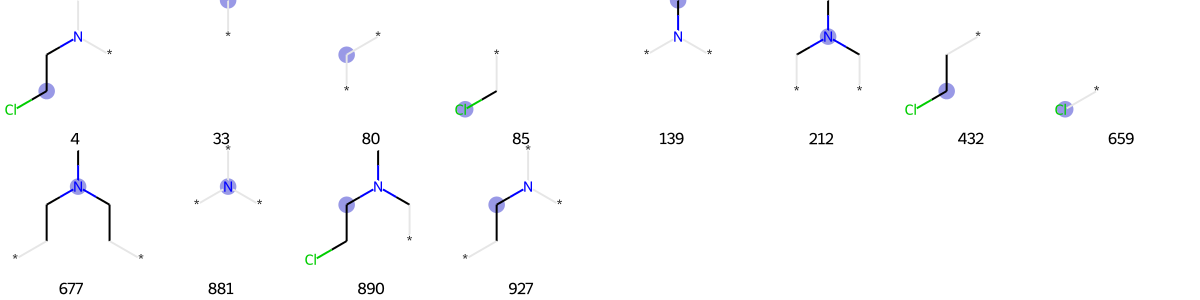

In [158]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [159]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[3,
 4,
 33,
 56,
 64,
 67,
 128,
 165,
 175,
 184,
 191,
 193,
 216,
 233,
 271,
 300,
 301,
 356,
 363,
 367,
 423,
 446,
 456,
 480,
 486,
 544,
 552,
 561,
 650,
 659,
 673,
 698,
 720,
 726,
 735,
 792,
 805,
 807,
 816,
 843,
 847,
 849,
 871,
 875,
 876,
 891,
 893,
 926,
 927,
 935,
 938,
 954,
 967,
 975,
 1019]

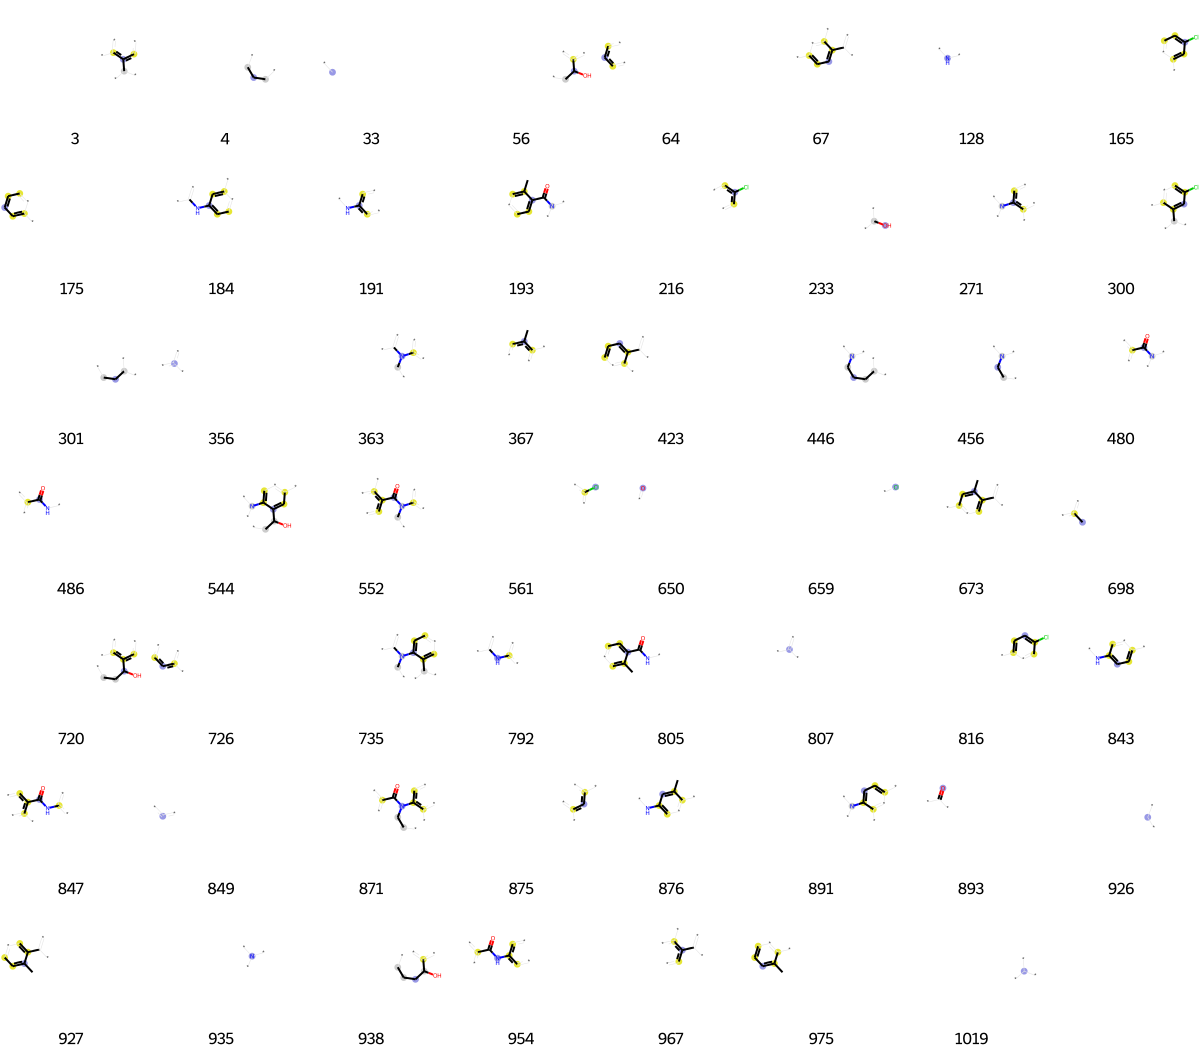

In [160]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [161]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[4,
 11,
 33,
 36,
 57,
 80,
 123,
 130,
 138,
 151,
 159,
 182,
 184,
 207,
 222,
 250,
 284,
 301,
 342,
 345,
 356,
 408,
 412,
 423,
 431,
 455,
 507,
 519,
 529,
 555,
 559,
 621,
 622,
 649,
 694,
 714,
 717,
 757,
 767,
 807,
 824,
 849,
 926,
 940,
 1013,
 1019]

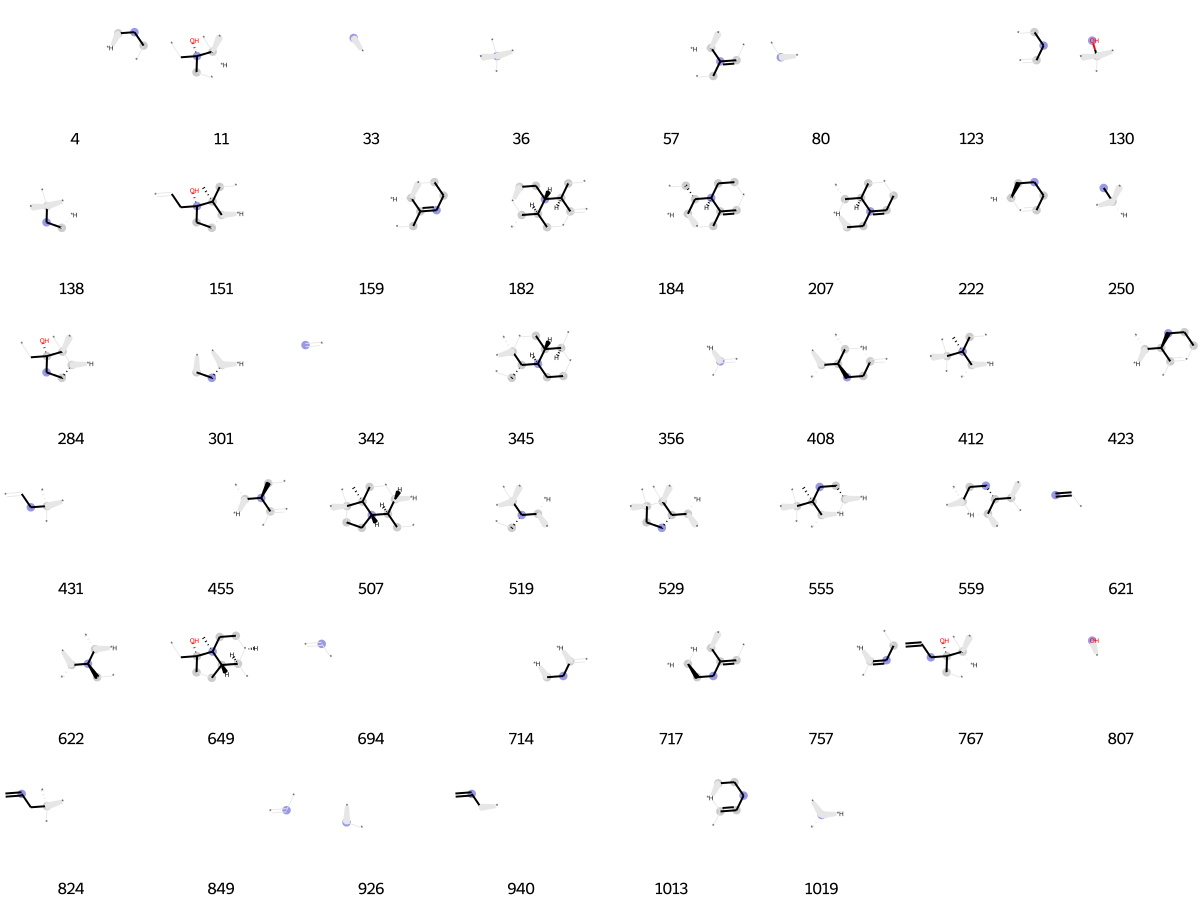

In [162]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [163]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 2,
 4,
 8,
 13,
 29,
 33,
 59,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 140,
 144,
 157,
 214,
 221,
 232,
 237,
 241,
 249,
 283,
 301,
 333,
 335,
 356,
 378,
 398,
 407,
 428,
 456,
 458,
 484,
 494,
 512,
 562,
 565,
 603,
 610,
 624,
 644,
 653,
 680,
 688,
 695,
 708,
 747,
 767,
 780,
 785,
 796,
 827,
 831,
 841,
 849,
 875,
 887,
 890,
 891,
 903,
 908,
 926,
 935,
 946,
 974,
 1018,
 1019]

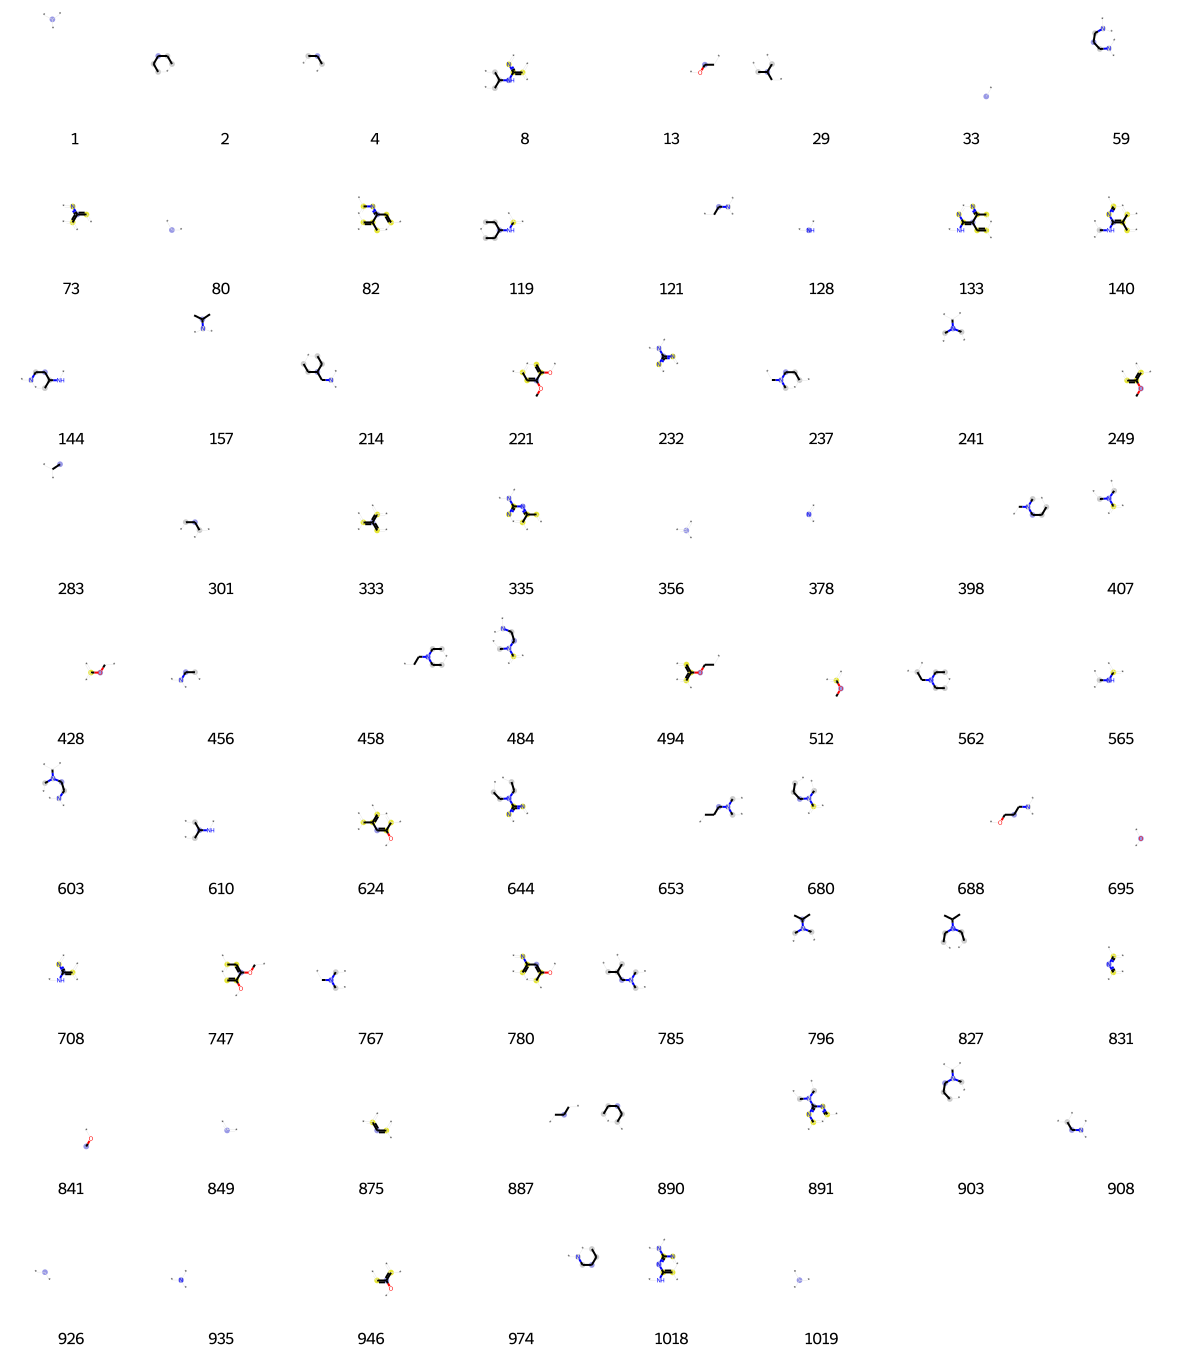

In [164]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [169]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[2,
 4,
 33,
 46,
 128,
 136,
 165,
 185,
 216,
 252,
 271,
 289,
 319,
 351,
 356,
 366,
 378,
 456,
 486,
 490,
 516,
 539,
 561,
 650,
 659,
 698,
 714,
 726,
 772,
 807,
 816,
 820,
 828,
 849,
 850,
 871,
 875,
 891,
 892,
 893,
 896,
 926,
 932,
 935,
 947,
 970,
 974,
 999,
 1020]

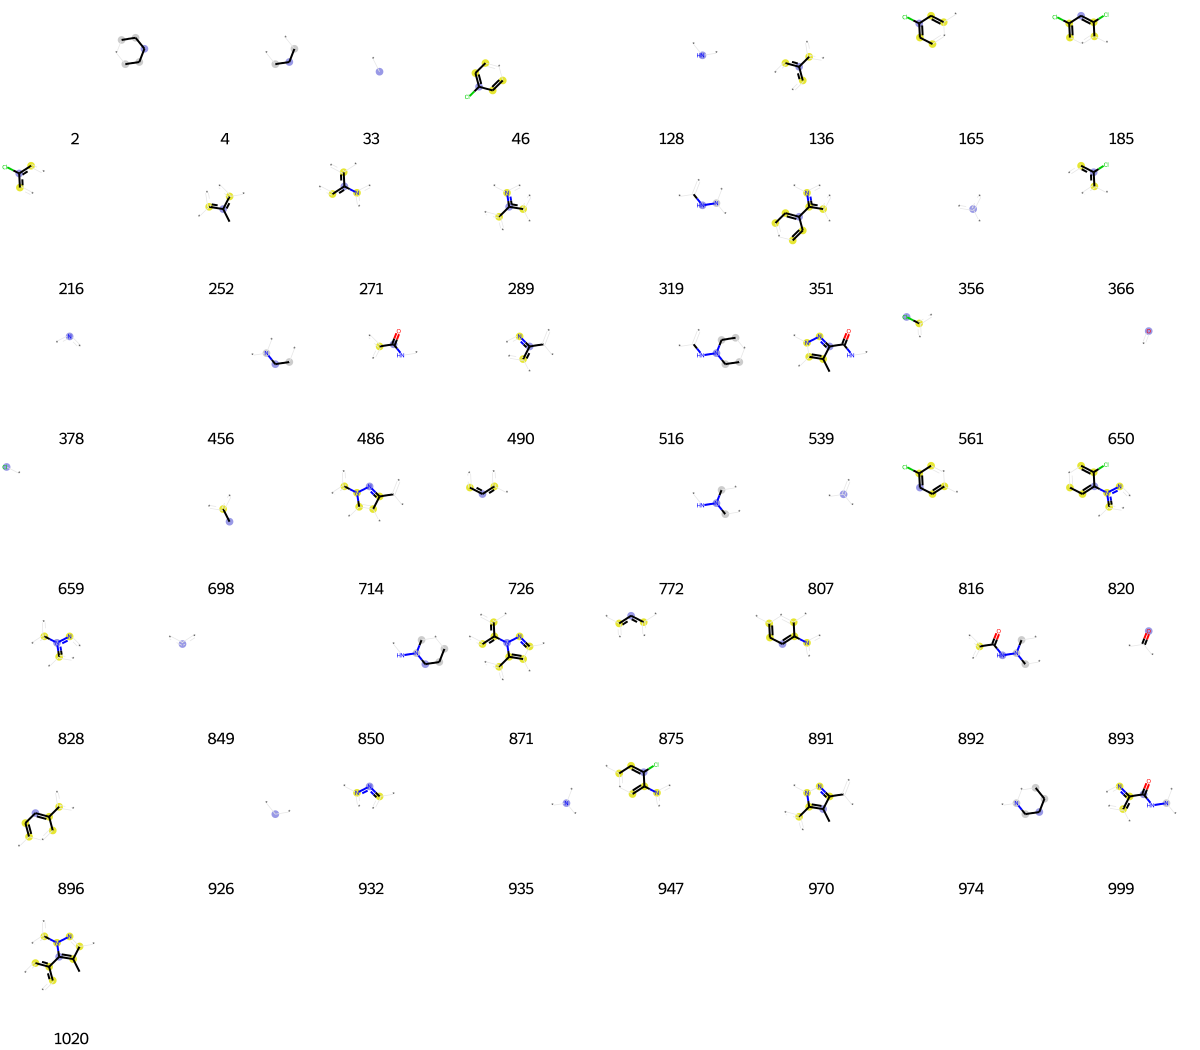

In [170]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [171]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[31,
 40,
 80,
 109,
 119,
 243,
 334,
 342,
 362,
 375,
 401,
 416,
 419,
 534,
 540,
 621,
 650,
 694,
 695,
 762,
 797,
 807,
 887,
 893,
 940]

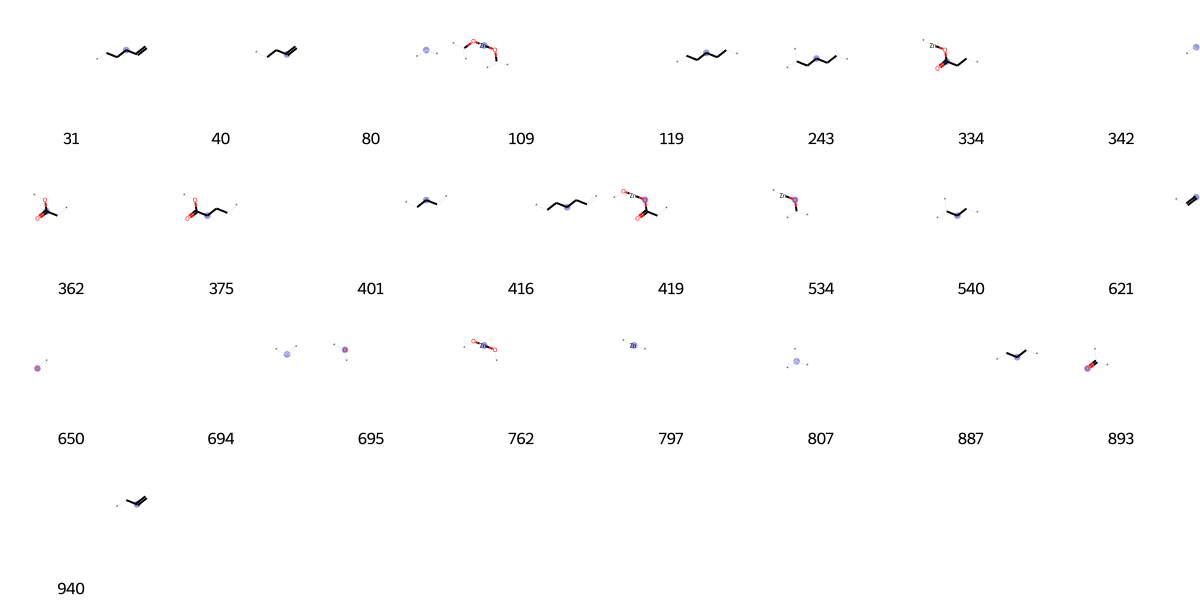

In [173]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [174]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[75,
 80,
 90,
 116,
 152,
 210,
 222,
 233,
 301,
 314,
 356,
 376,
 454,
 456,
 463,
 492,
 493,
 556,
 610,
 650,
 656,
 671,
 684,
 740,
 807,
 820,
 853,
 896,
 897,
 926,
 935,
 1019]

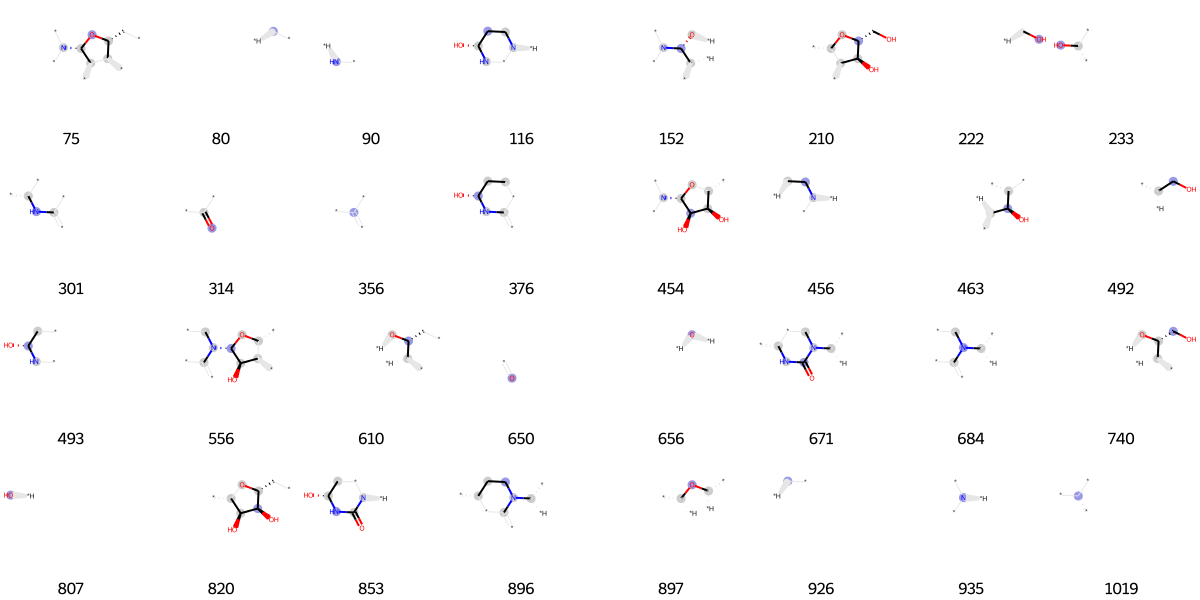

In [175]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [176]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[4,
 10,
 29,
 33,
 42,
 80,
 112,
 117,
 121,
 147,
 148,
 149,
 190,
 194,
 249,
 301,
 314,
 325,
 356,
 360,
 361,
 386,
 407,
 446,
 456,
 463,
 564,
 646,
 650,
 674,
 680,
 699,
 702,
 726,
 732,
 739,
 740,
 741,
 771,
 790,
 802,
 808,
 818,
 838,
 849,
 852,
 864,
 875,
 904,
 926,
 935,
 942,
 1019]

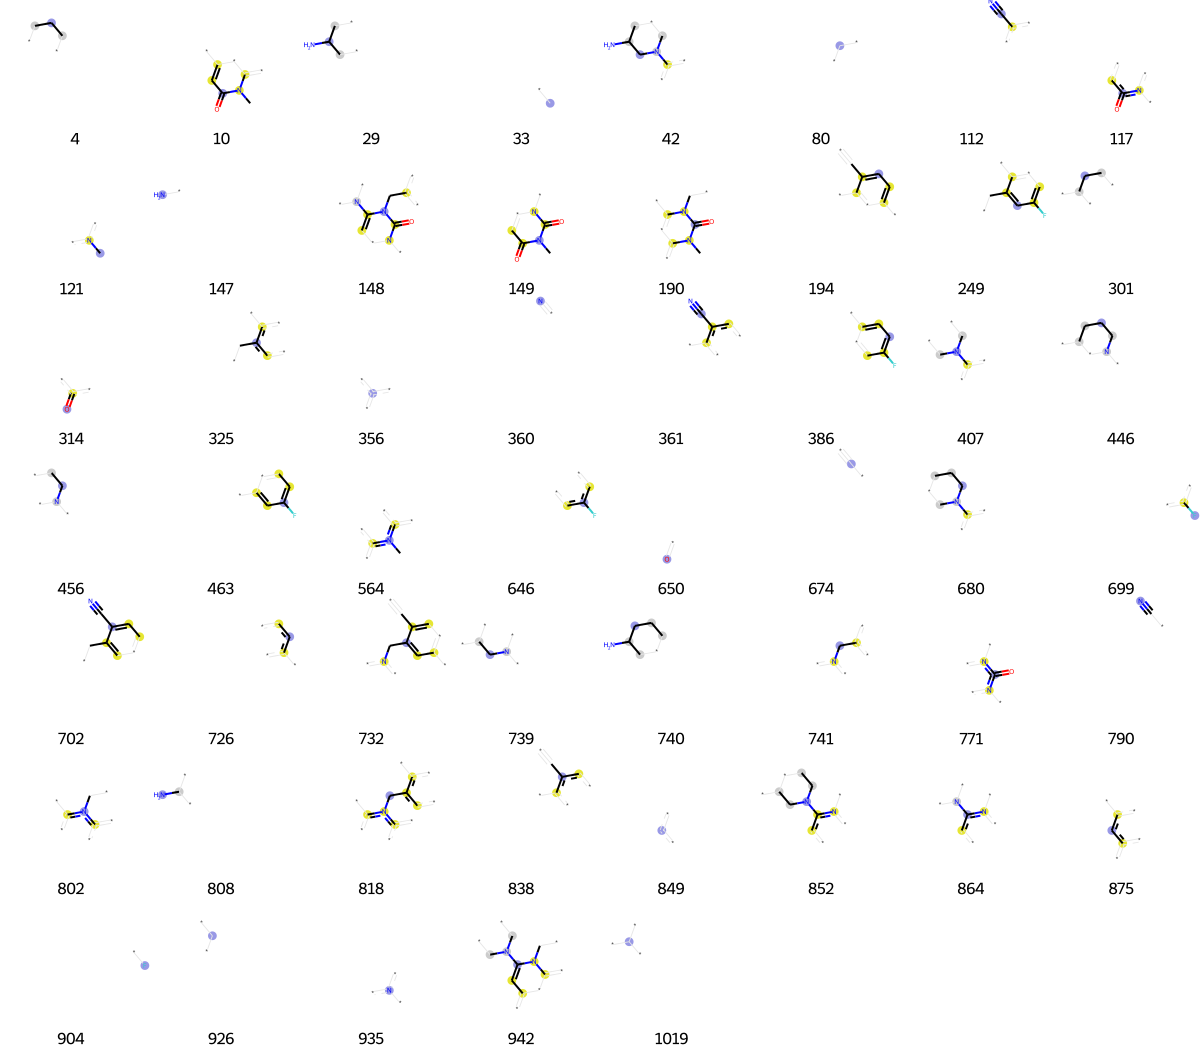

In [177]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [178]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 14,
 20,
 33,
 67,
 73,
 108,
 117,
 128,
 131,
 200,
 221,
 240,
 249,
 283,
 322,
 333,
 346,
 356,
 365,
 378,
 412,
 428,
 512,
 543,
 554,
 559,
 573,
 593,
 596,
 603,
 613,
 624,
 635,
 647,
 650,
 673,
 675,
 695,
 718,
 724,
 726,
 780,
 787,
 792,
 807,
 832,
 841,
 842,
 849,
 875,
 893,
 905,
 946,
 965,
 1019]

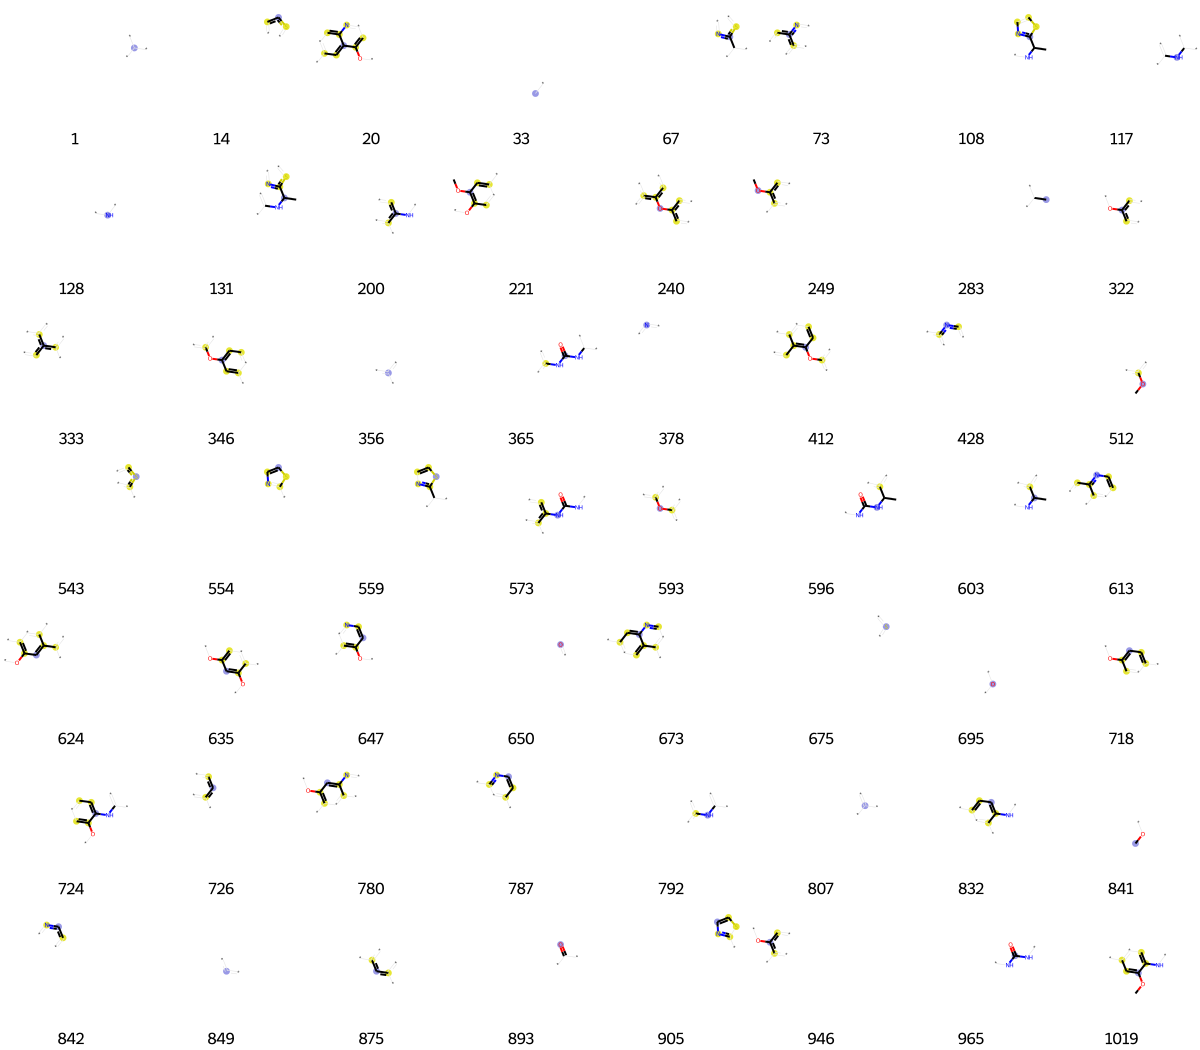

In [179]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [192]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[3,
 15,
 33,
 64,
 78,
 80,
 90,
 119,
 121,
 128,
 149,
 193,
 204,
 212,
 231,
 254,
 268,
 269,
 294,
 353,
 356,
 371,
 387,
 449,
 455,
 486,
 510,
 519,
 560,
 580,
 610,
 650,
 665,
 710,
 726,
 739,
 759,
 773,
 806,
 807,
 849,
 855,
 881,
 893,
 913,
 926,
 932,
 935,
 960,
 971,
 978,
 1008,
 1019]

In [190]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[3,
 4,
 15,
 29,
 33,
 36,
 49,
 80,
 102,
 104,
 105,
 114,
 118,
 138,
 186,
 212,
 249,
 250,
 289,
 301,
 356,
 362,
 381,
 408,
 413,
 453,
 455,
 484,
 519,
 540,
 549,
 561,
 562,
 578,
 593,
 622,
 636,
 650,
 682,
 695,
 713,
 714,
 726,
 745,
 766,
 807,
 823,
 832,
 849,
 875,
 890,
 893,
 926,
 927,
 1019]

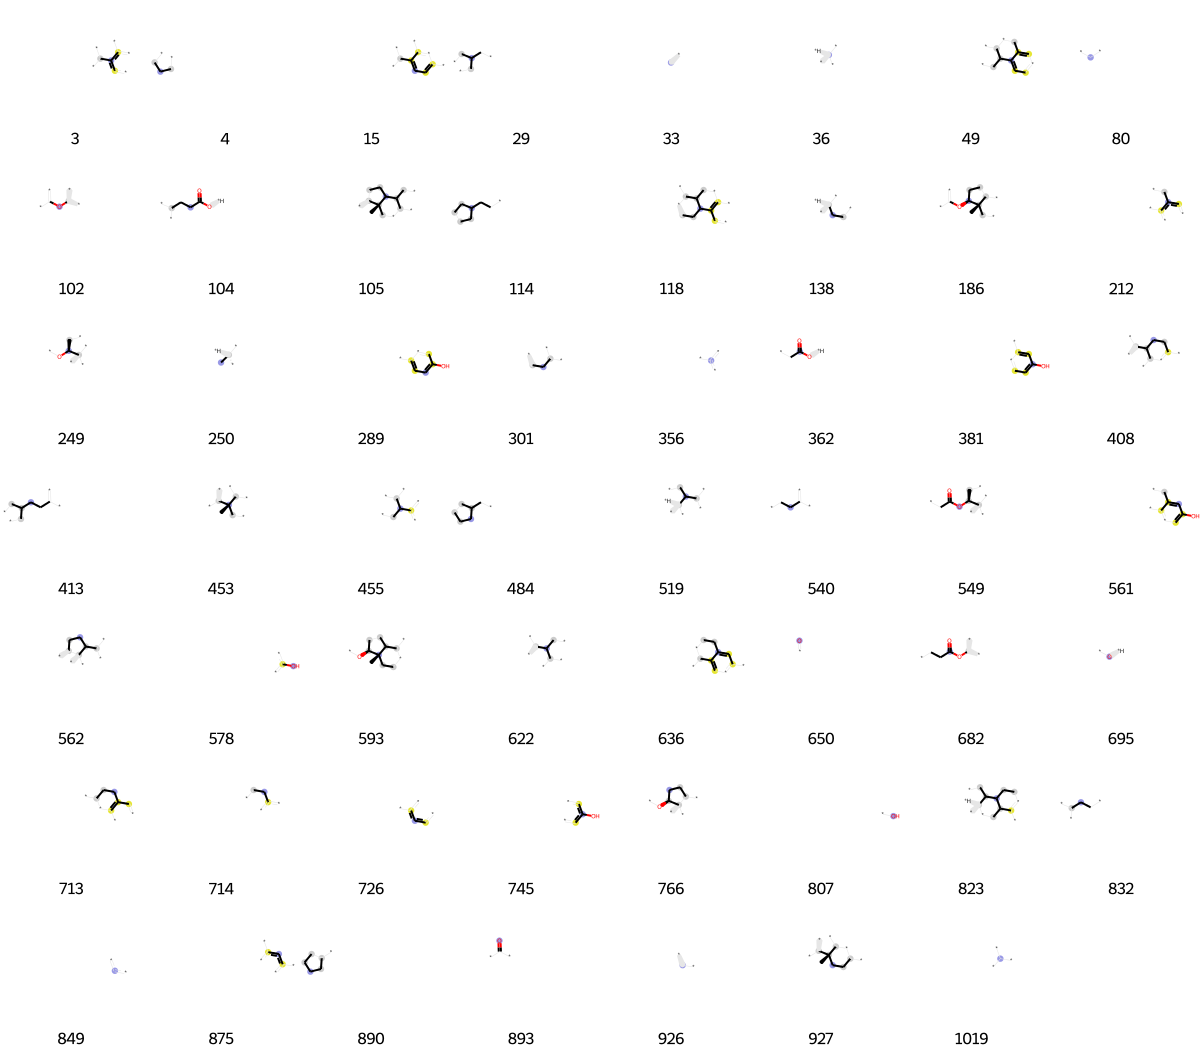

In [191]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [194]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[3,
 33,
 53,
 80,
 87,
 90,
 94,
 115,
 140,
 212,
 221,
 249,
 305,
 310,
 356,
 458,
 483,
 512,
 538,
 575,
 636,
 649,
 695,
 714,
 720,
 726,
 730,
 826,
 841,
 849,
 875,
 926,
 946,
 947,
 957,
 1019]

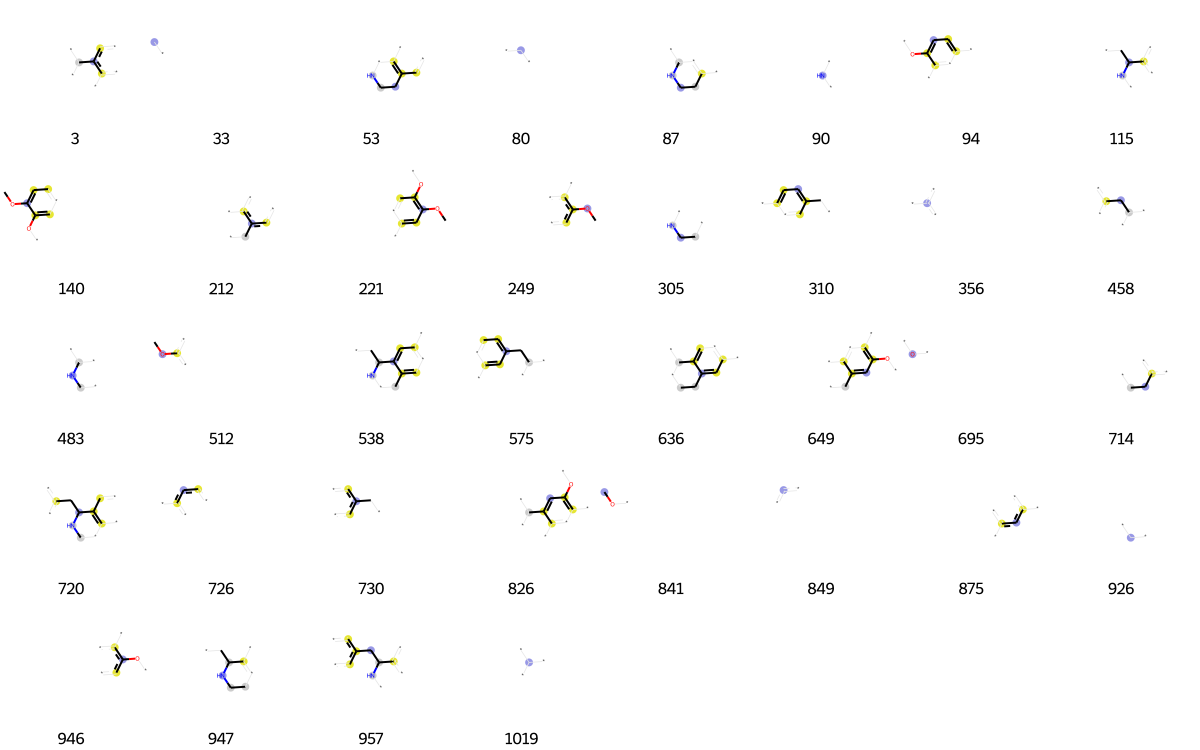

In [195]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [196]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 46,
 80,
 102,
 118,
 216,
 222,
 227,
 322,
 356,
 421,
 428,
 482,
 526,
 561,
 658,
 659,
 695,
 718,
 726,
 807,
 816,
 849,
 953,
 1014]

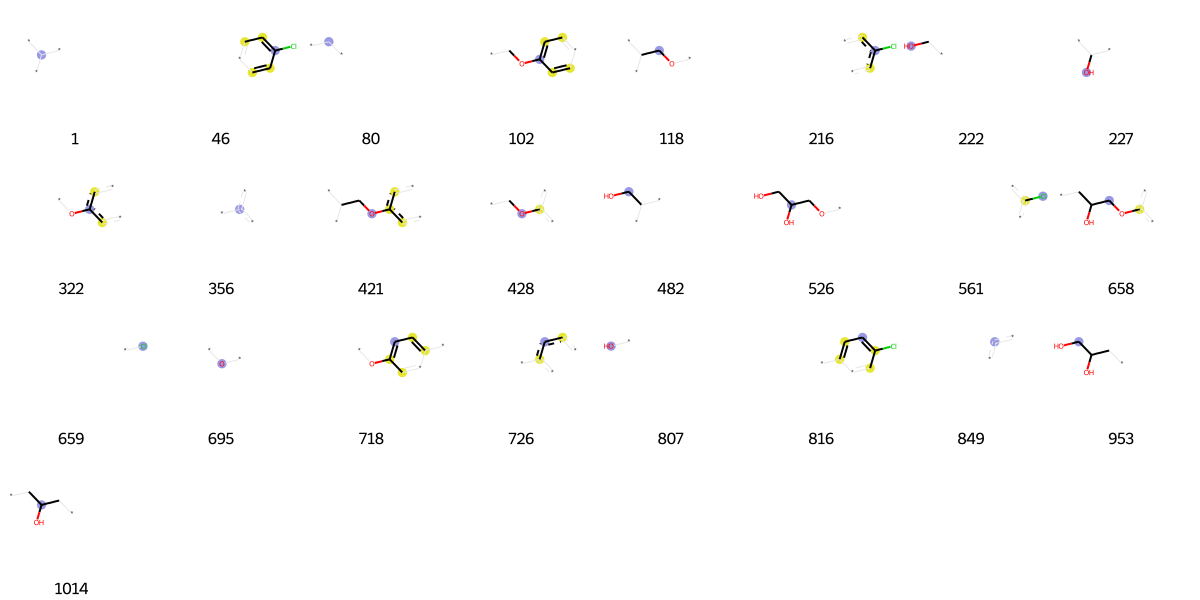

In [197]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [200]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 45,
 67,
 74,
 80,
 87,
 96,
 164,
 215,
 231,
 244,
 271,
 285,
 308,
 314,
 333,
 349,
 356,
 363,
 368,
 382,
 389,
 407,
 419,
 456,
 478,
 484,
 501,
 515,
 525,
 536,
 567,
 580,
 586,
 620,
 650,
 656,
 675,
 684,
 698,
 699,
 713,
 741,
 767,
 771,
 784,
 807,
 816,
 835,
 849,
 875,
 880,
 893,
 904,
 926,
 935,
 955,
 974,
 1007,
 1019]

In [203]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[32,
 33,
 36,
 90,
 119,
 136,
 155,
 184,
 194,
 203,
 204,
 257,
 322,
 323,
 356,
 362,
 378,
 383,
 394,
 430,
 448,
 478,
 512,
 552,
 579,
 585,
 621,
 640,
 661,
 674,
 695,
 715,
 718,
 721,
 726,
 781,
 798,
 831,
 835,
 841,
 842,
 849,
 875,
 896,
 941,
 948]

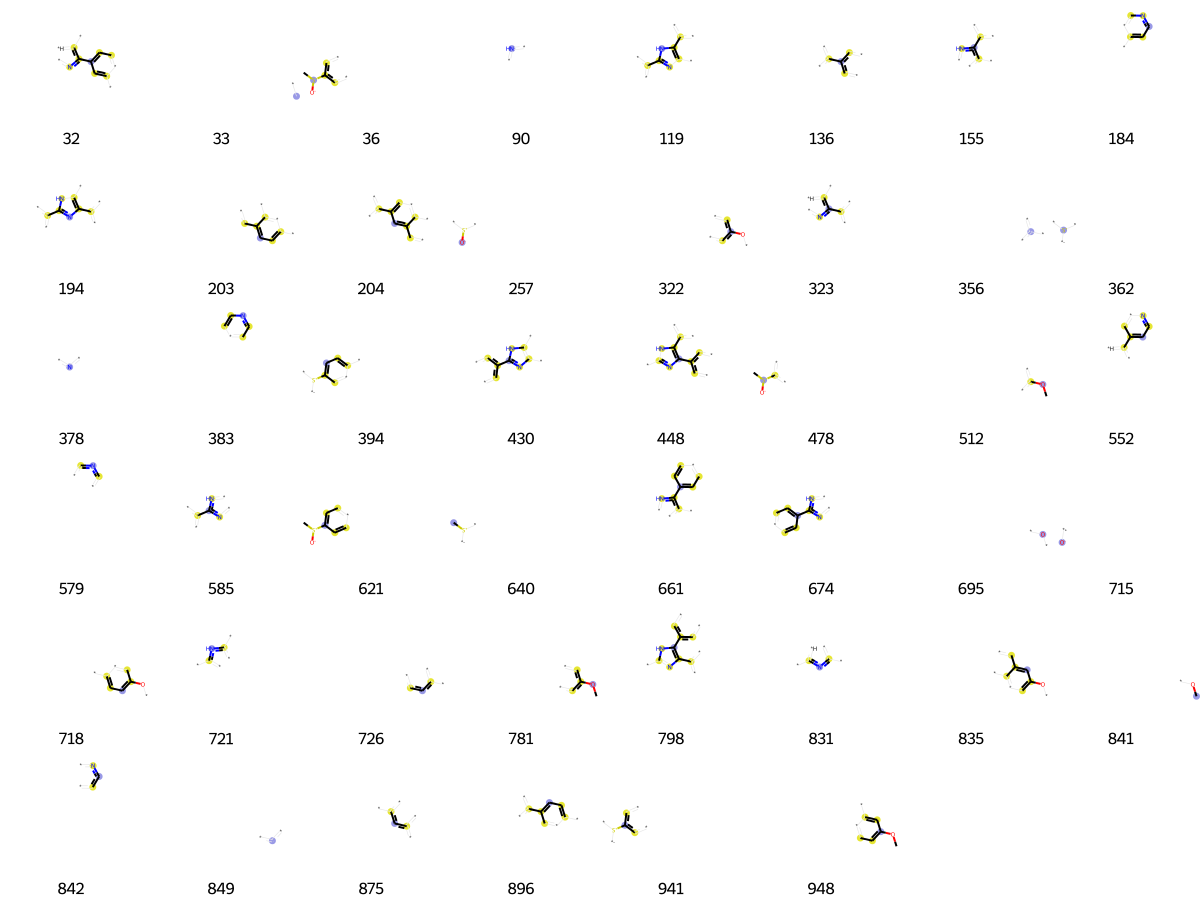

In [204]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [205]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[10,
 19,
 33,
 64,
 84,
 112,
 114,
 127,
 128,
 136,
 191,
 212,
 218,
 249,
 257,
 262,
 271,
 322,
 356,
 360,
 363,
 373,
 375,
 377,
 378,
 419,
 429,
 437,
 456,
 501,
 511,
 512,
 562,
 579,
 588,
 607,
 646,
 649,
 650,
 695,
 699,
 714,
 726,
 736,
 767,
 792,
 807,
 809,
 841,
 842,
 849,
 864,
 875,
 893,
 904,
 926,
 935,
 945,
 946,
 981]

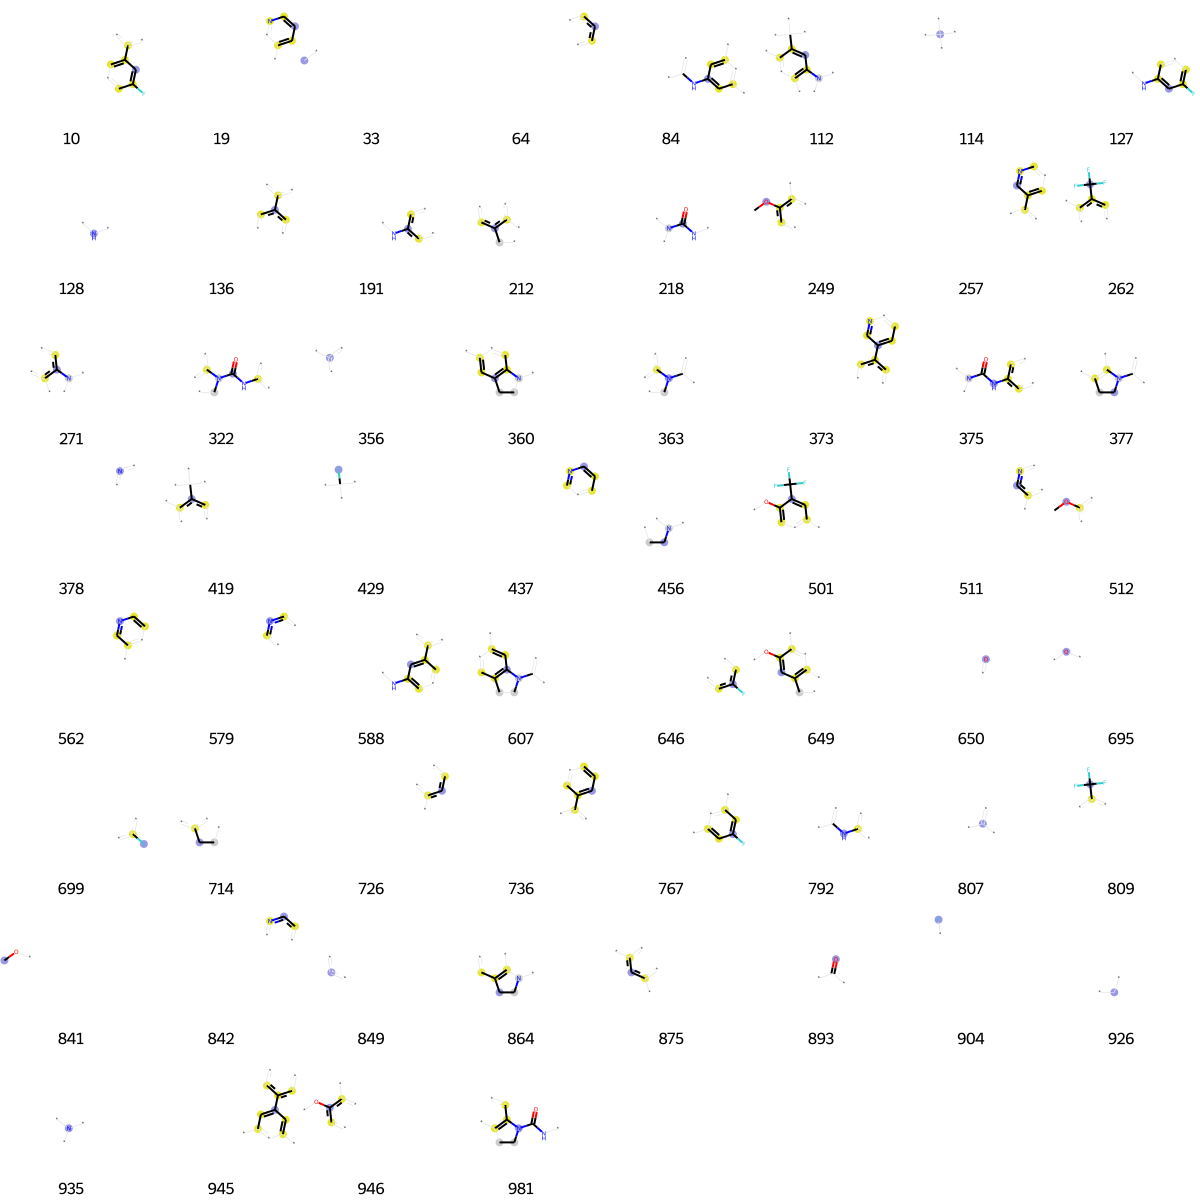

In [206]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [207]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 59,
 64,
 89,
 90,
 128,
 256,
 272,
 305,
 313,
 356,
 366,
 378,
 381,
 383,
 425,
 491,
 514,
 555,
 561,
 659,
 726,
 800,
 836,
 842,
 849,
 881,
 926,
 974]

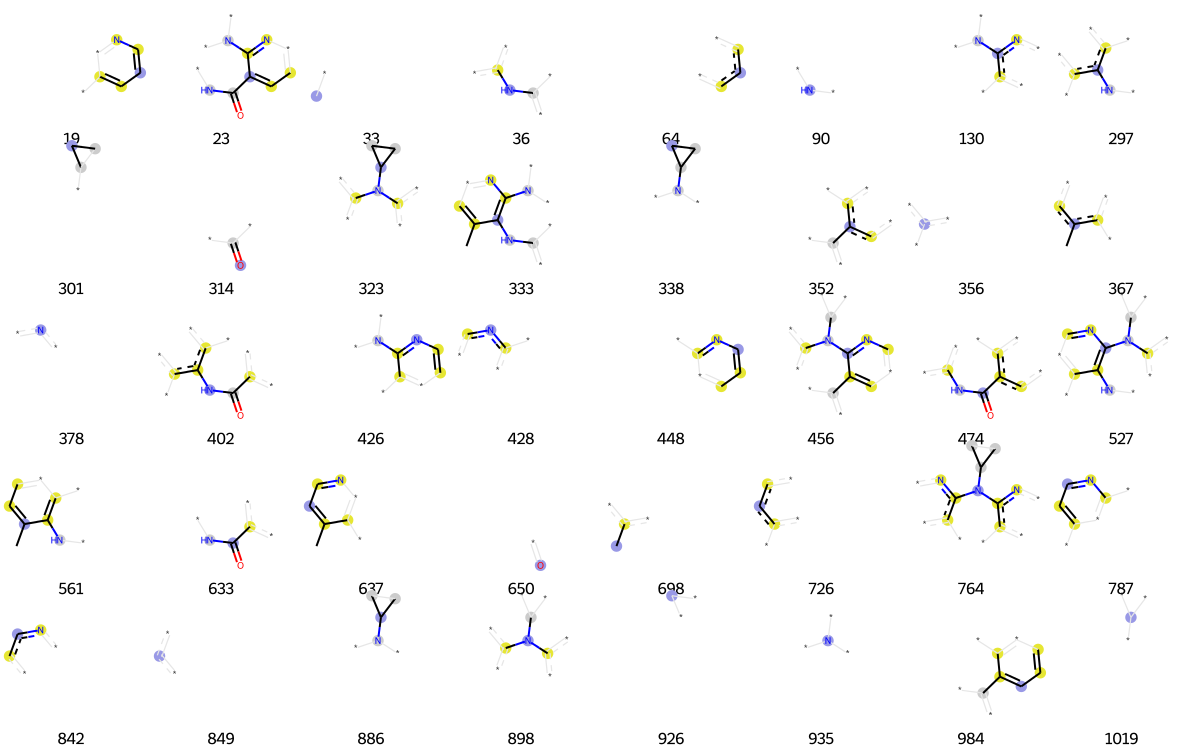

In [208]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [209]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 10,
 13,
 21,
 33,
 79,
 80,
 90,
 102,
 187,
 205,
 214,
 217,
 219,
 267,
 294,
 310,
 316,
 322,
 332,
 350,
 356,
 389,
 428,
 438,
 452,
 457,
 650,
 692,
 695,
 706,
 718,
 726,
 730,
 806,
 807,
 820,
 849,
 852,
 857,
 893,
 967,
 999]

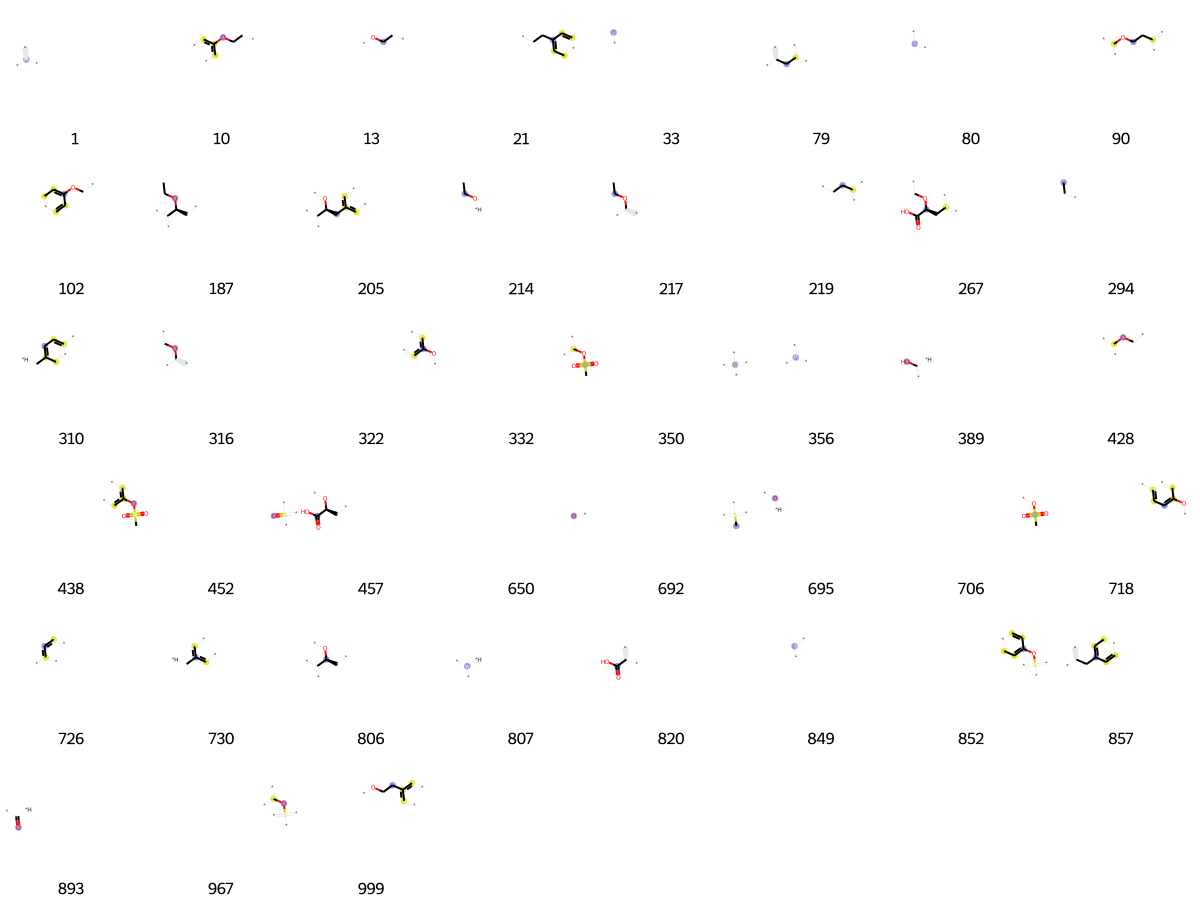

In [210]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [213]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[7,
 16,
 33,
 36,
 46,
 124,
 138,
 186,
 192,
 222,
 231,
 233,
 250,
 255,
 265,
 266,
 268,
 285,
 301,
 302,
 320,
 345,
 356,
 377,
 385,
 439,
 445,
 453,
 504,
 508,
 519,
 529,
 590,
 598,
 622,
 645,
 656,
 694,
 696,
 757,
 775,
 795,
 807,
 849,
 850,
 860,
 890,
 899,
 926,
 927,
 999,
 1009,
 1014,
 1017,
 1019]

In [ ]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

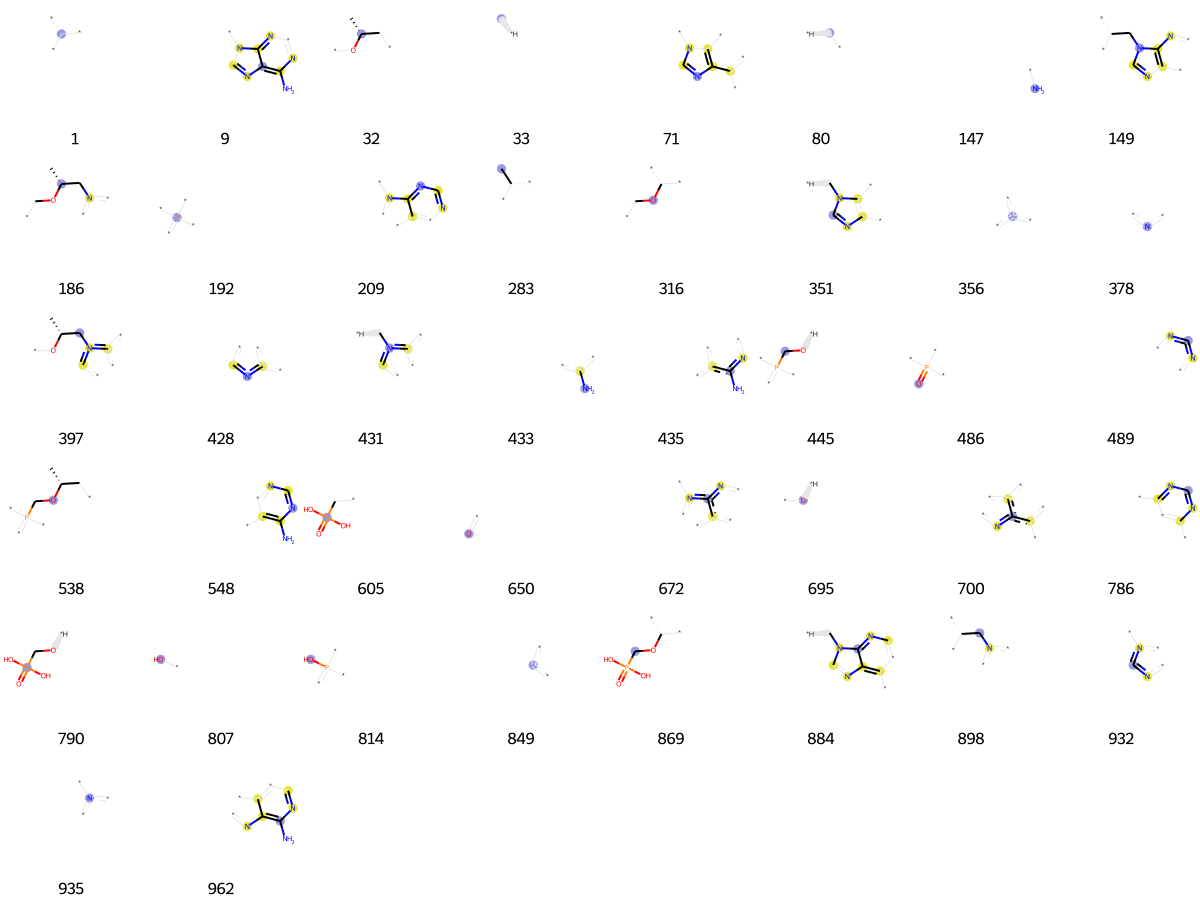

In [216]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [217]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[8,
 22,
 64,
 77,
 93,
 114,
 175,
 356,
 366,
 368,
 375,
 378,
 389,
 393,
 419,
 430,
 465,
 561,
 579,
 630,
 635,
 645,
 659,
 726,
 842,
 843,
 849,
 915,
 932,
 935,
 974,
 993]

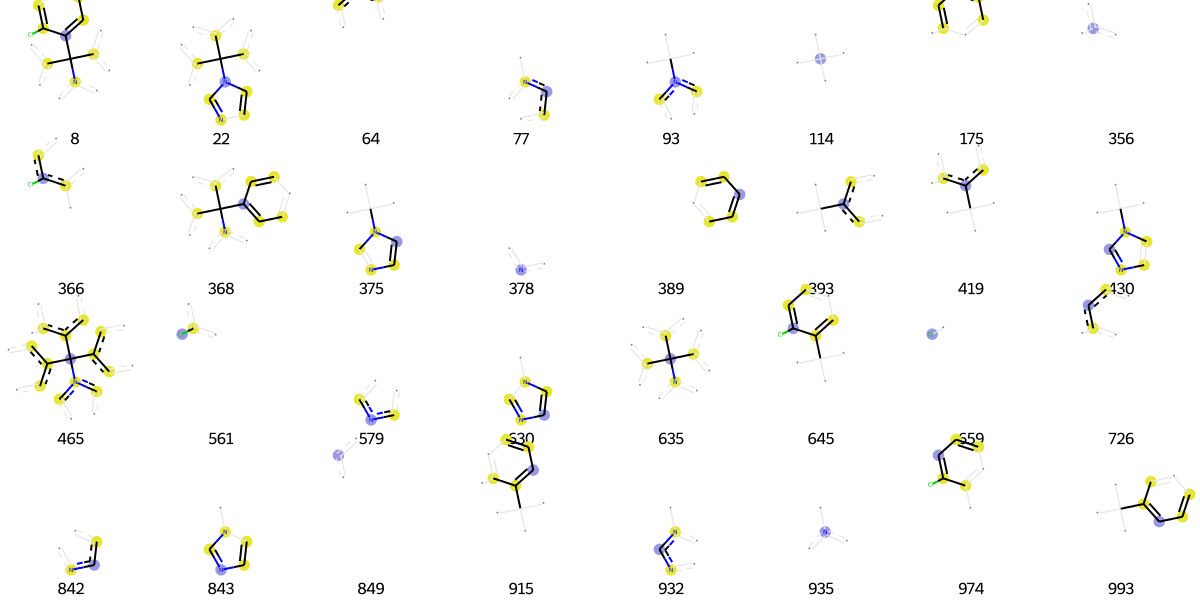

In [218]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [219]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 4,
 33,
 80,
 86,
 118,
 128,
 169,
 182,
 227,
 235,
 283,
 329,
 356,
 366,
 428,
 430,
 550,
 561,
 606,
 658,
 659,
 666,
 695,
 698,
 726,
 782,
 791,
 799,
 807,
 849,
 875,
 946,
 1006,
 1013,
 1014]

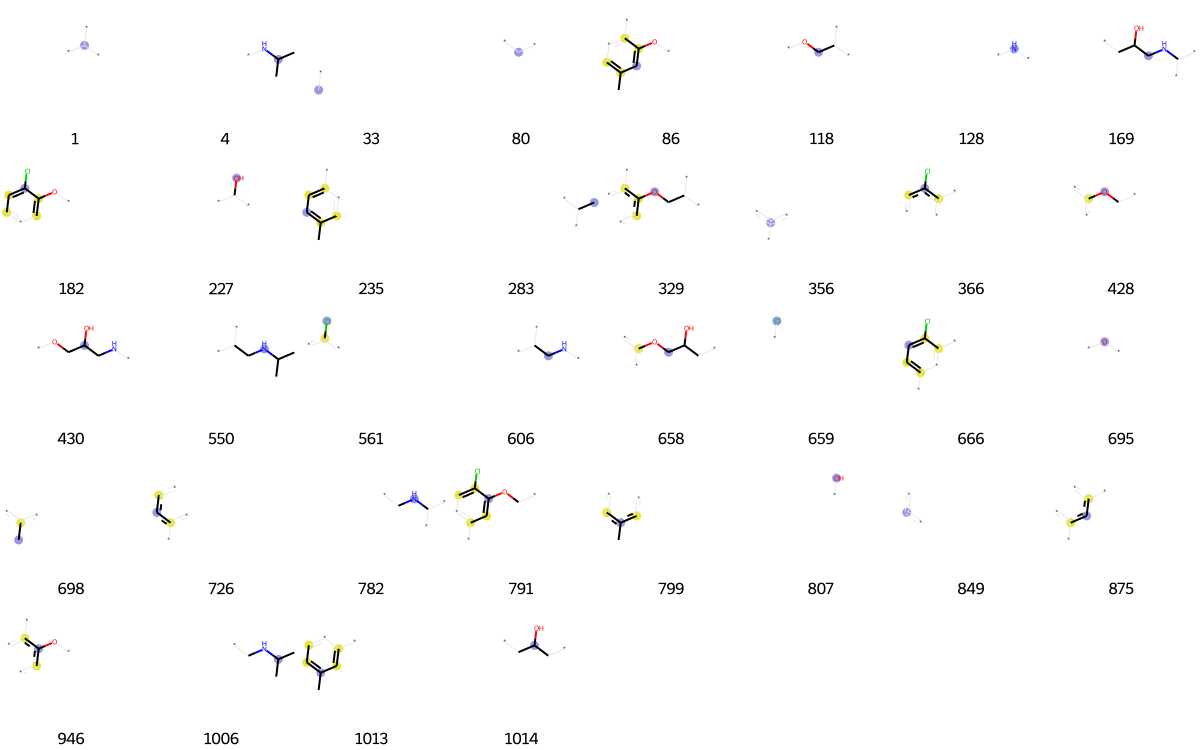

In [220]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [221]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[10,
 36,
 37,
 90,
 128,
 140,
 147,
 226,
 301,
 314,
 356,
 359,
 387,
 502,
 537,
 545,
 650,
 671,
 792,
 807,
 816,
 893,
 950,
 1019]

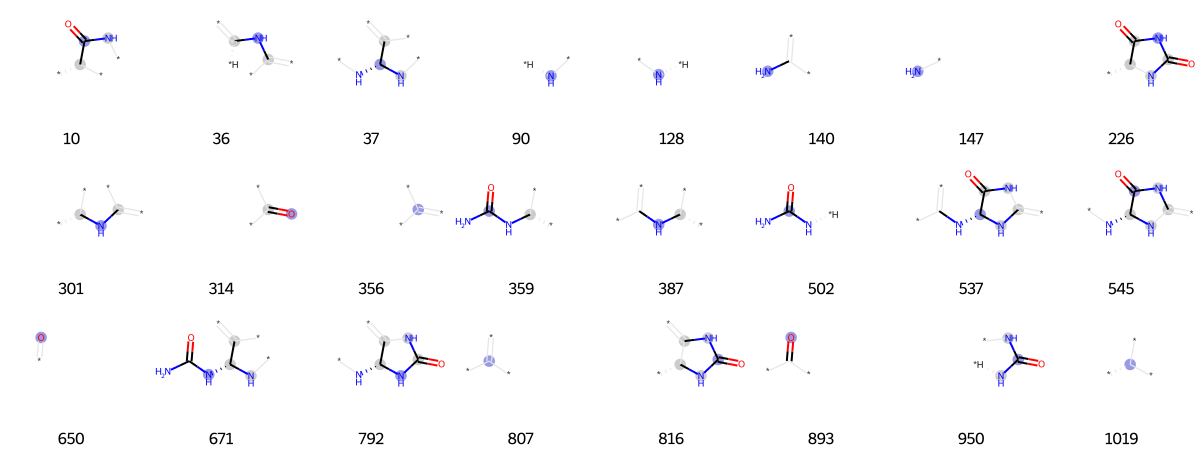

In [222]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [236]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[4,
 33,
 36,
 55,
 138,
 184,
 209,
 223,
 240,
 250,
 267,
 301,
 313,
 314,
 356,
 389,
 418,
 453,
 478,
 486,
 492,
 526,
 533,
 551,
 632,
 650,
 778,
 787,
 807,
 831,
 889,
 893,
 895,
 910,
 926,
 940,
 1004,
 1016,
 1019]

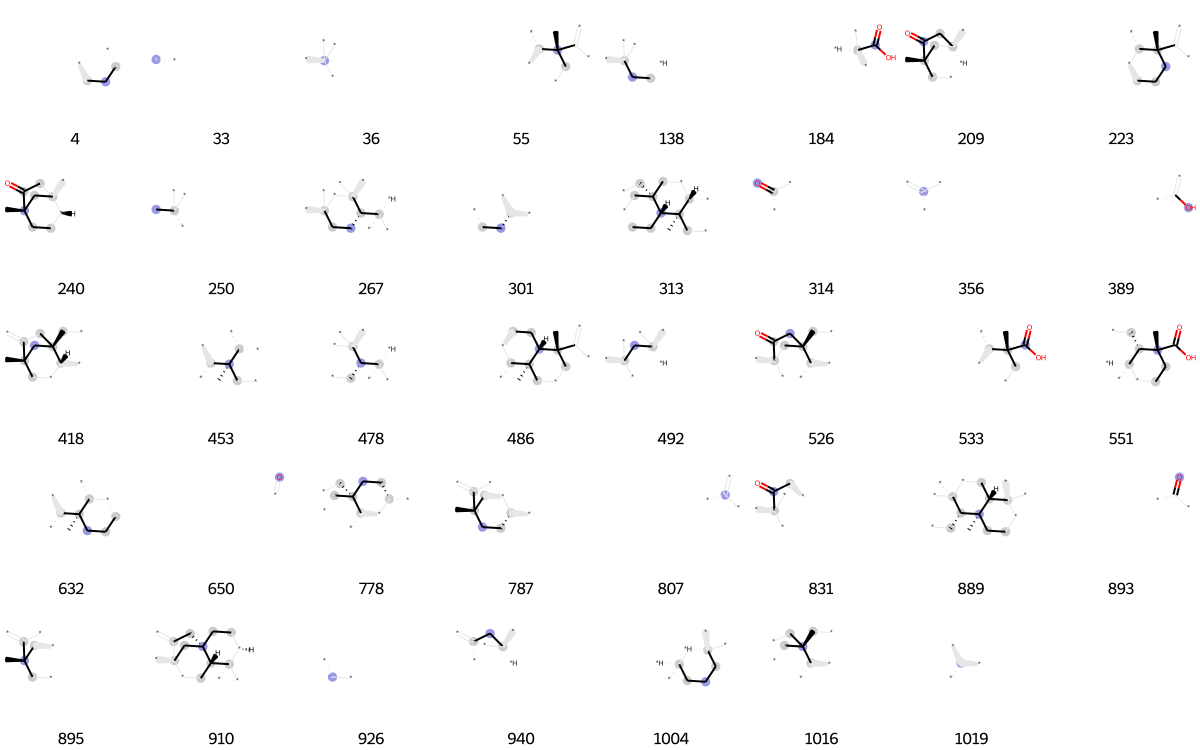

In [237]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [230]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[15,
 33,
 41,
 62,
 63,
 64,
 80,
 116,
 127,
 128,
 162,
 175,
 231,
 325,
 330,
 333,
 341,
 356,
 378,
 385,
 406,
 428,
 431,
 457,
 460,
 482,
 496,
 511,
 549,
 567,
 573,
 642,
 649,
 650,
 656,
 663,
 675,
 698,
 707,
 726,
 735,
 758,
 792,
 807,
 831,
 849,
 862,
 875,
 893,
 935,
 1004]

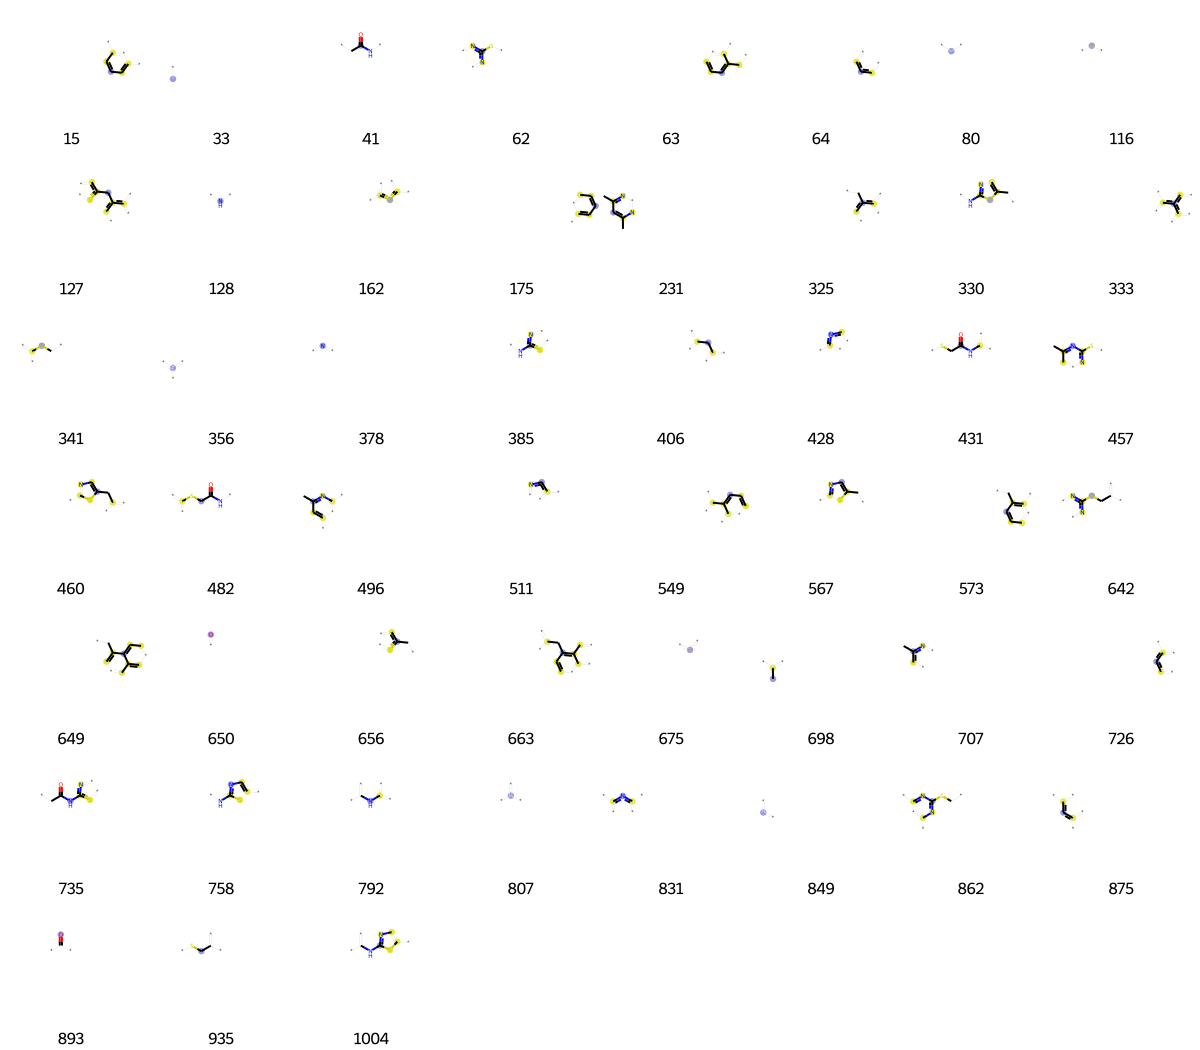

In [231]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [227]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[3,
 33,
 94,
 128,
 158,
 184,
 212,
 245,
 249,
 292,
 301,
 314,
 333,
 352,
 356,
 387,
 422,
 512,
 575,
 613,
 646,
 649,
 650,
 658,
 680,
 695,
 707,
 713,
 714,
 723,
 726,
 807,
 812,
 841,
 849,
 868,
 875,
 893,
 899,
 904,
 906,
 920,
 926,
 946,
 949,
 976,
 1017,
 1019]

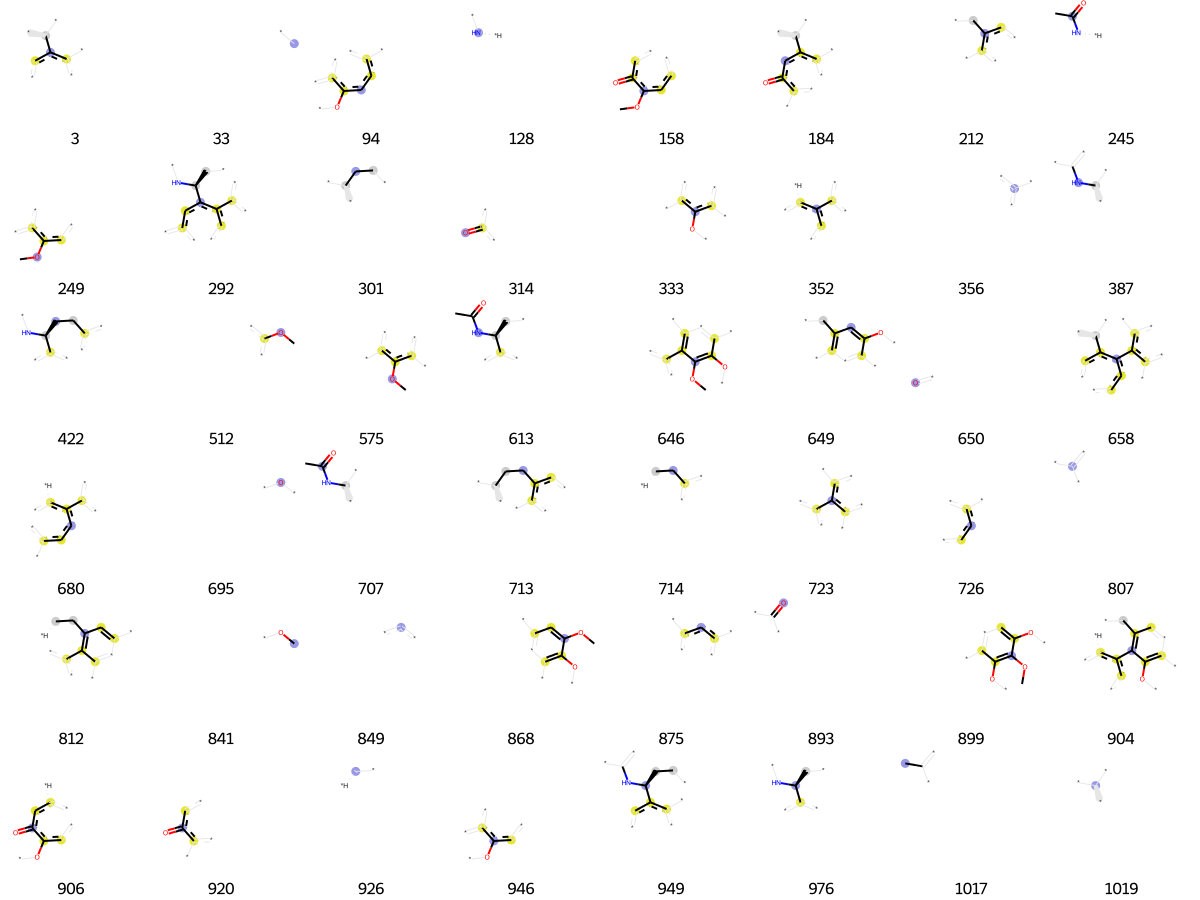

In [228]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [232]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[8,
 19,
 33,
 54,
 58,
 64,
 73,
 102,
 105,
 109,
 114,
 119,
 168,
 171,
 189,
 233,
 249,
 316,
 333,
 342,
 356,
 360,
 378,
 392,
 393,
 410,
 416,
 428,
 430,
 437,
 485,
 511,
 562,
 579,
 629,
 641,
 645,
 669,
 674,
 698,
 710,
 726,
 790,
 801,
 831,
 842,
 849,
 875,
 917,
 930,
 935,
 953,
 961,
 969]

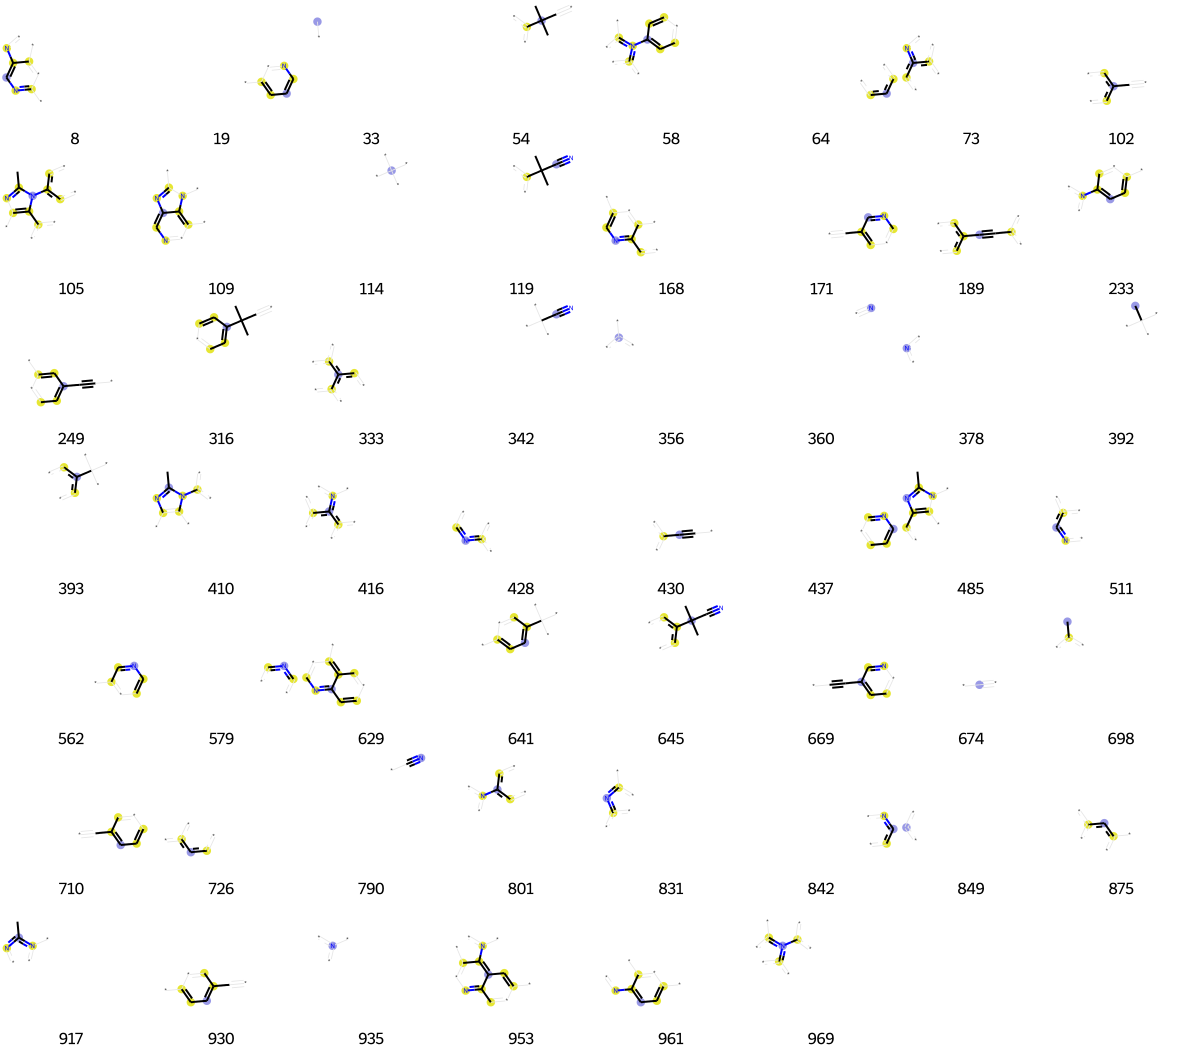

In [233]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [234]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[5,
 18,
 33,
 36,
 56,
 64,
 125,
 126,
 128,
 130,
 175,
 181,
 189,
 198,
 202,
 233,
 248,
 250,
 255,
 292,
 314,
 323,
 332,
 345,
 352,
 356,
 361,
 366,
 378,
 387,
 404,
 461,
 486,
 518,
 561,
 586,
 611,
 650,
 656,
 659,
 673,
 675,
 698,
 715,
 726,
 753,
 790,
 807,
 835,
 849,
 893,
 909,
 913,
 919,
 935,
 936,
 974,
 984,
 1014,
 1019]

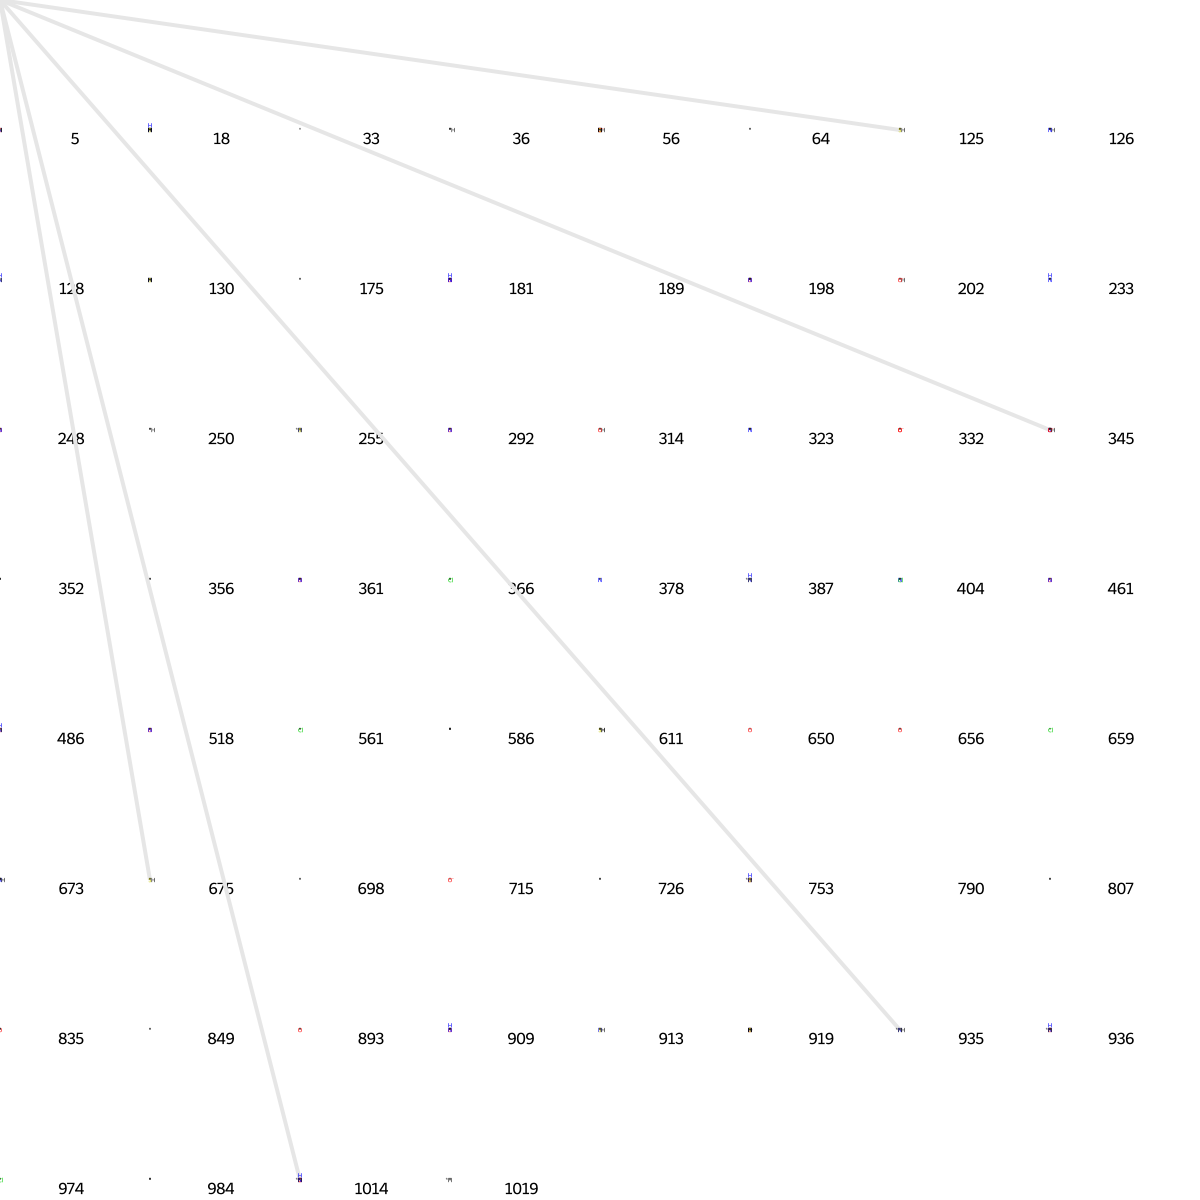

In [235]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])